# MedTrix

This is a project to generate medical records

## Part One: Data Analysis & Topic Modeling

## Notebook Settings

#### Path

In [2]:
from pathlib import Path
import os

# Sets base path
b_path = Path.home() / 'Development' / 'medtrix'
os.chdir(b_path)
!ls

d_path = b_path / 'dataset'
n_path = b_path / 'notebook'
s_path = b_path / 'scripts'
list_fake_path = d_path / 'lists_fake_data'

dataset		 images    mlruns    poetry.lock     requirements.txt
Dockerfile	 LICENSE   model     pyproject.toml  scripts
environment.yml  logs.log  notebook  README.md	     src


#### Install

In [2]:
!python --version

Python 3.10.4


In [ ]:
!which python

In [2]:
!pip install spacy
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.2.4                         
Location         /home/leolara/miniconda3/envs/cond_medtrix_env/lib/python3.10/site-packages/spacy
Platform         Linux-5.17.15-051715-generic-x86_64-with-glibc2.35
Python version   3.10.6                        
Pipelines        en_core_sci_sm (0.5.0), en_ner_bc5cdr_md (0.5.0)



In [1]:
!pip install numpy
!pip install sklearn
!pip install wordcloud
!pip install gensim
!pip install matplotlib
!pip install nltk
!pip install transformers==4.21.1
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install bitsandbytes-cuda113
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bc5cdr_md-0.5.0.tar.gz
!pip install stanza
!pip install negspacy
!pip install spacy_stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=c0d88a63a3b9b28249c6c07d6c73e11861c379f63378a8b7289a17de24bb86aa
  Stored in directory: /home/leolara/.cache/pip/wheels/c5/88/35/cc8a1e198b27a1d3d9d3f9b30090b9d5531778847835472ec4
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 3.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.7 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.4 MB/s eta 0:00:0031m44.4 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 49.9 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 7.4 MB/s eta 0:00:008.8 MB/s eta 0:00:01
  Using cached huggingface_hub-0.11.0-py3-none-any.whl (182 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 10.8 MB/s eta 0:00:000:00:01m eta 0:00:01
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 17.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 2.8 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 31.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.3 MB/s eta 0:00:0031m74.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 2.9 MB/s eta 0:00:002.9 MB/s eta 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 26.4 MB/s eta 0:00:00
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.5/806.5 kB 47.5 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 43.8 MB/s eta 0:00:00
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.4 MB/s eta 0:00:001m59.8 MB/s eta 0:00:01
  Using cached confection-0.0.3-py3-none-any.whl (32 kB)
  Created wheel for nmslib: filename=nms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 22.8 MB/s eta 0:00:00
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.5.0-py3-none-any.whl size=15871032 sha256=6107fea319a6838eda88d97a93da283145325f0a87bd573eec63c80957dee059
  Stored in directory: /home/leolara/.cache/pip/wheels/e5/ac/89/48952be52d4098fe9bb3c276aeca515f995d145163ceb8654c
Successfully built en-core-sci-sm
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: thinc
    Found existing installation

  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.0-py3-none-any.whl size=120215842 sha256=0aa04d0130401173b8b2d7a84c631c5ee19d408fcec3ee63e400cb1f6a38fd47
  Stored in directory: /home/leolara/.cache/pip/wheels/44/e8/99/517b2d53bb44945cf7a96208d44bae722e13f028736a1f1f4f
Successfully built en-ner-bc5cdr-md
  Using cached stanza-1.4.2-py3-none-any.whl (691 kB)
  Using cached emoji-2.2.0.tar.gz (240 kB)
  Preparing metadata (setup.py) ... done
  Using cached protobuf-4.21.9-cp37-abi3-manylinux2014_x86_64.whl (408 kB)
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=3f569d60b3e2fb9f1ba4bd306aeea4b3e3707eafd8b0c26f70ec26588cff0c4f
  Stored in directory: /home/leolara/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Preparing metadata (setup.py) ... done


  Created wheel for negspacy: filename=negspacy-1.0.3-py3-none-any.whl size=10417 sha256=98b56a9317bd84862b29bba11eb14da562c1bf6de158d4039fb129cd1adb00ec
  Stored in directory: /home/leolara/.cache/pip/wheels/af/f0/30/a18306a89261772f9b742bf0a09213493730bf93dfd5918bf2
Successfully built negspacy
  Using cached spacy_stanza-1.0.2-py3-none-any.whl (9.7 kB)


In [3]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz


  Using cached stanza-1.4.2-py3-none-any.whl (691 kB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


#### Import

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import warnings
import os
import random
import pickle
import stanza
import spacy_stanza
import scispacy
import medspacy
from medspacy.ner import TargetRule
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
from spacy import displacy
from scipy.special import softmax
from negspacy.negation import Negex
from spacy.tokens import Span
from tqdm import tqdm

/home/leobit/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/leobit/anaconda3/envs/conda_medtrix_env/lib/python3.10/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/leobit/anaconda3/envs/conda_medtrix_env/lib/python3.10/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


#### Configuration

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
stanza.download('en', package='mimic', processors={'ner': 'i2b2'}, verbose=False)

In [40]:
stanza.download('en', package='mimic', processors={'ner': 'AnatEM'}, verbose=False)

In [5]:
warnings.filterwarnings('ignore')
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/leobit/nltk_data...


True

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/leobit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/leobit/nltk_data...


True

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leobit/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Topics Analysis

### MIMIC-III

MIMIC-III is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. The database includes information such as demographics, vital sign measurements made at the bedside (~1 data point per hour), laboratory test results, procedures, medications, caregiver notes, imaging reports, and mortality (including post-hospital discharge).

You can read more about MIMIC-IV from the following resources:

* [The MIMIC-III PhysioNet project page](https://physionet.org/content/mimiciii/1.4/)
* [The MIMIC-III online documentation](https://mimic.mit.edu/)

In [6]:
# Load MIMIC-III
df_mimic_full = pd.read_csv(d_path / "mimic-iii.csv", index_col=0)

# Replace wrong texts
mimic_replace_d = {
    ":[**":": [**",
    "#:":":",
    "\n\nD:":"\n\nDate:"
}
for orig, repl in mimic_replace_d.items():
    df_mimic_full['TEXT'] = df_mimic_full['TEXT'].apply(lambda x: x.replace(orig, repl))

In [7]:
df_mimic_full

TEXT   HADM_ID  \
0      {Admission Date:  [**2117-9-11**]             ...  100001.0   
1      {Admission Date:  [**2150-4-17**]             ...  100003.0   
2      {Admission Date:  [**2108-4-6**]       Dischar...  100006.0   
3      {Admission Date:  [**2145-3-31**]             ...  100007.0   
4      {Admission Date:  [**2162-5-16**]             ...  100009.0   
...                                                  ...       ...   
52717  {Admission Date:  [**2161-10-23**]       Disch...  199993.0   
52718  {Admission Date:  [**2188-7-7**]       Dischar...  199994.0   
52719  {Admission Date: [**2137-12-11**]        Disch...  199995.0   
52720  {Admission Date:  [**2119-2-18**]             ...  199998.0   
52721  {Admission Date:  [**2136-4-4**]              ...  199999.0   

                                               ICD9_CODE  
0      ['25013', '3371', '5849', '5780', 'V5867', '25...  
1      ['53100', '2851', '07054', '5715', '45621', '5...  
2      ['49320', '51881', '486', '20300', '2761', '78...  
3               ['56081', '5570', '9973', '486', '4019']  
4      ['41401', '99604', '4142', '25000', '27800', '...  
...                                                  ...  
52717  ['41031', '42821', '42731', '4271', '5180', '4...  
52718  ['486', '4280', '51881', '3970', '496', '4169'...  
52719  ['4210', '7464', '42971', '30401', '4412', '44...  
52720  ['41401', '9971', '9975', '42731', '78820', '4...  
52721  ['48284', '51881', '5119', '5849', '2761', '78...  

[52722 rows x 3 columns]

In [1]:
print(df_mimic_full[df_mimic_full['HADM_ID']==182664.0].values[0][0])

NameError: name 'df_mimic_full' is not defined

In [45]:
print(df_mimic_full.iloc[300].to_list()[0])

{Admission Date:  [**2144-1-20**]              Discharge Date:   [**2144-1-23**]

Date of Birth:  [**2100-3-11**]             Sex:   M

Service: CARDIOTHORACIC

Allergies:
Patient recorded as having No Known Allergies to Drugs

Attending: [**First Name3 (LF) 5790**]
Chief Complaint:
SVC thrombosis

Major Surgical or Invasive Procedure:
removal of port-a-cath
thrombolysis with TPA


History of Present Illness:
43 yo male with hx of rectal CA, DMII, and histoplasmosis now
presents with SVC partial thrombosis now admitted to ICU for
thrombolysis. He has been undergoing XRT and 5-FU which he has
be tolerating well. Over the past 2-3 weeks he has had worsening
chest pain. CTA on [**1-3**] revealed no PE and he was evaluated on
by his thoracic surgeon for incisional pain but it was not felt
to be due to the incisions. He continued to have vague pain
radiating to his shoulders and biceps bilaterally but didn't
notice any facial or arm swelling. There was concern that his
portacath was malfunc

In [46]:
print(df_mimic_full.iloc[300].to_list()[2])

['99674', '4538', '1541', '11599', '78791', 'E9331']


In [11]:
# Pattern to get Topics
sections_d = defaultdict(int)
add_topics = ['Admission Date(?=\:)', 'Discharge Date(?=\:)', 'Sex(?=\:)', 'Chief Complaint(?=\:)', '(?i)HISTORY OF PRESENT ILLNESS(?=\:)']
pattern = re.compile(f"((?<=\\n\\n)[\w\s]+(?=\:))|{'|'.join(add_topics)}", flags=0)

In [10]:
# Quantity on each Topic
for text in df_mimic_full['TEXT']:
    for m in pattern.finditer(text):
        s = m.group().replace('\n','')
        sections_d[s.lower()]+=1

In [159]:
df_sections = pd.DataFrame(sorted(sections_d.items(), key = lambda x: x[1], reverse=True), columns=['section','qtd'])

<AxesSubplot:ylabel='section'>

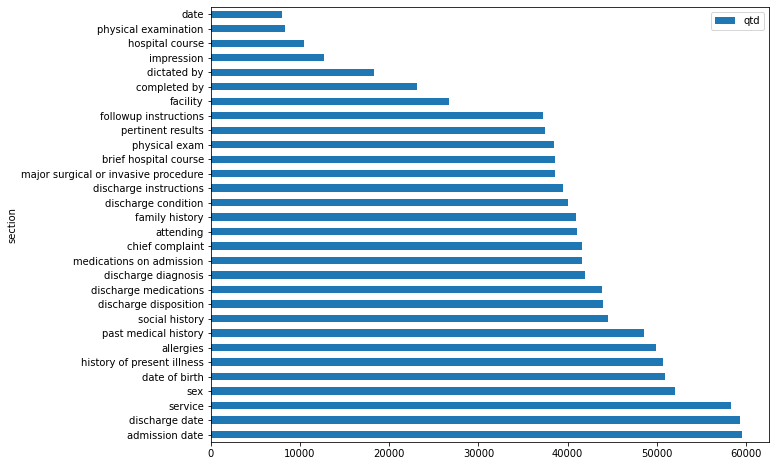

In [160]:
df_sections.head(30).plot.barh(x='section', y='qtd', figsize=(10,8))

### Topics Example

In [14]:
english_nlp = spacy.blank('en')

In [12]:
# Topic Document Sample
def gen_document_sample(n):
    text = df_mimic_full['TEXT'].loc[n]
    doc = english_nlp(text)
    spans_list = []

    for m in pattern.finditer(text):
        start = m.start()
        end = m.end()
        tok_start = len(english_nlp(text[:start]))
        tok_end = tok_start + len(english_nlp(text[start:end]))
        span = doc[tok_start:tok_end]
        span.label_ = "TOPIC"
        spans_list.append(span)
    doc.ents = spans_list
    displacy.render(doc, style="ent")

In [11]:
for text in df_mimic_full['TEXT']:
    sections_text = get_topics_text(text)
    for section, _text in sections_text.items():
        if any(("procedure" in i) for i in [section.lower(), _text]):
            print("SECTION: "+section)
            print("TEXT:"+_text)
            print("")

SECTION: major_surgical_or_invasive_procedure
TEXT:none  

SECTION: major_surgical_or_invasive_procedure
TEXT:EGD Right IJ CVL  

SECTION: discharge_instructions
TEXT:You were admitted for bleeding from an ulcer in your stomach. This ulcer is at least partially caused by naproxen.  You should stop taking naproxen and take only tylenol for pain.  You should not take any NSAIDS for pain including ibuprofen, naproxen, aleve, motrin, aspirin, toradol, or advil. It is okay to take tylenol but do not take more than 4 extra strength tylenol a day (2gram daily maximum). . The following medication changes were made: Do not take naproxen Take pantoprazole 40 mg twice daily for one week.  Then take 40 mg daily. . You are scheduled to get a repeat endoscopy next week.  Prior to the procedure do not have anything to drink or eat after midnight. . Please return to the ER if you have any chest pain, lightheadeness, fever, chills, bloody or black stools or any other concerning symptoms.  

SECTION: ma

SECTION: major_surgical_or_invasive_procedure
TEXT:None.  

SECTION: major_surgical_or_invasive_procedure
TEXT:Intra-aortic Balloon pump placement Impella - Left Ventricular Assist Device Cardiac catheterization PICC placement Left Groin Central Venous Catheter. SWAN catheter placed, Left groin  

SECTION: discharge_instructions
TEXT:You had an infection in your blood and acute respiratory and kidney failure that is now resolving. You are still receiving an oral antibiotic to treat the blood infection. You had a catheterization that showed some moderate blockages in your coronary arteries but they were not severe enough to get a balloon procedure or a stent. Your bowel function slowed because of your illness, however there is no evidence of infection in your stool.  

SECTION: major_surgical_or_invasive_procedure
TEXT:coronary artery bypass grafts (LIMA-LAD, SVG-OM1, SVG-OM2,SVG-DG) [**12-21**] left heart cathaterization and coronary angiography  

SECTION: general_comments
TEXT:A TEE 


SECTION: hospital_course
TEXT: The patient was admitted for semielective mastectomy with [**Last Name (un) 5884**] on the right reconstruction.  The patient was taken to the operating room on [**2115-5-30**], and had the procedure performed as outlined above.  The patient tolerated the procedure well without complication in the postoperative course, she was immediately placed in the Intensive Care Unit for close monitoring.  The patient had flap checks per protocol q 30 minutes for the first 12 to 24 hours followed by q1 hour followed by q2 hour checks.  The flap seemed to be doing well, and a Doppler probe was left close to the venous outflow postoperatively.  Flap was seen to be doing very well, and the patient was transferred to the floor on postoperative day #3.  Subsequent to this, the patient had an unremarkable hospital stay, and the Doppler probe was removed on postoperative day #4, the patient subsequently discharged to home.  

SECTION: major_surgical_or_invasive_procedure
T

TEXT:25 year old man with a history of repaired tetralogy of Fallot at age 15 months, palpitation and syncopal episode while watching a baseball game [**Hospital1 14628**] in [**2141-6-11**] with subsequent implantation of a [**Company 1543**] [**Last Name (un) 19961**] ICD with a Sprint Fidelis 6949 lead, which is currently on FDA advisory, inappropriate shocks for sinus tachycardia in the past, and two appropriate shocks in [**2145**] for fast VT, who was electively admitted for explant of his Fidelis lead and reimplantation of a new lead/generator  Of note, the patient was recently seen in clinic as he heard his device beeping. Interrogation revealed that since his last clinic visit in [**2147-9-11**], he had one nonsustained VT episode but no sustained arrhythmias. His ICD has reached ERI and today he underwent explant of his Fidelis lead and reimplantation of a new RV lead/generator.  During his procedure, a 16 french sheath was placed. He had an estimated blood loss of 500 cc. Hi

SECTION: major_surgical_or_invasive_procedure
TEXT:Sigmoidoscopy ([**2115-7-28**]) EGD ([**2115-7-28**])  

SECTION: major_surgical_or_invasive_procedure
TEXT:PICC line placement  

SECTION: major_surgical_or_invasive_procedure
TEXT:Right upper lobectomy [**3-27**] for Right upper lobe  nodule  

SECTION: brief_hospital_course
TEXT:62 M s/p RUL lobectomy [**3-27**] for RUL nodule. Patient tolerated procedure fairly well, slow to wake post procedure, pain control w/ dilaudid/bup epidural. On arrival to PACU extubated, pt unarrousable to verbal stimuli; CT x2right to suction. PACU course sig for continued lethergy, epidural decreased with improvement in mental status- awake to verbal and tactile stimuli, speech slurred, VSS. Transferred to floor after 5 hour PACU course in stable condition per PACU protocol.  POD#1--[**3-29**] HLIV/Reg diet/CT to waterseal, blakes to bulb- not holding suction overnight.Neuro- drowsy, arrousable, slurred speech, LE tremors( baseline), A&Ox2-3, sitter 1:1>


SECTION: physical_examination
TEXT:  Vitals on admission were a temperature of 98.4, pulse 73, blood pressure 124/62, respiratory rate 16, oxygen saturation 98% on room air. Physical examination was significant for bilateral lower extremity 2+ edema.  There was a loud diastolic murmur.  HO[**Last Name (STitle) **] COURSE:  The patient was made nothing by mouth, consented, and taken to the operating room on [**2136-1-13**].  He had a CBC of 8.3/41.0/163.  Chemistry 13.7/28.3/100.3 for the coags.  Chemistry 143/4.7/106/27/30/1.4.  The patient was taken for an AVR re-do with a CE-21 with Dr. [**Last Name (Prefixes) **].  He tolerated the procedure well.  Postoperatively, he was transferred to the Unit, where he was on amiodarone and Nipride drips, which were slowly discontinued.  He was on Cipro postoperatively, as well as Captopril and amiodarone since he had ventricular bigeminy.  On [**2136-1-16**], the patient was transferred back to the floor. His chest tubes and wires had been disc


SECTION: major_surgical_or_invasive_procedure
TEXT:Transesophageal [**First Name3 (LF) **]  

SECTION: brief_hospital_course
TEXT:A/P: 52yo M with Crohn's disease s'p multiple surgeries complicated by shortgut syndrome and dependency on TPN with hx of multiple line infections, endocarditis and osteomyelitis. . 1.  Fever: Initially felt to be septic with SBP in 90's. Cultures were initially negative, clear CXR, fungal cx negative. TEE was performed which showed reappearance of MV [**Month/Day (4) **] and worsening MR. [**Name13 (STitle) **] was started on daptomycin, ambisome. Then found to have fungal elements on blood smear, and then had a fungal culture consistent with malassezia furfur. In addition gram + cocci seen on the same blood smear and Staph epi grew out of 1 culture. Further identification is pending to determine if it is a contaminant of the same organism that was present in his osteomyelitis.Initially had wanted to have his Hickman pulled, but per IR this would be a very


SECTION: discharge_instructions
TEXT:It was a pleasure taking care of you Mr [**Known lastname 5850**]. You were admitted to the hospital with difficulty breathing which was likely due to a post-infectious bacterial pneumonia given your recent bout of influenza. Because it was so difficult to breathe, you required mechanical ventilation (breathing machine) and were treated with antibiotics. You also had a stroke while you were in the hospital and you were started on anticoagulation medications.  Your renal function worsened and you had a renal biopsy which showed acute tubular necrosis.  Your renal function gradually improved.  You were found to have an abdominal wall hematoma and you underwent an interventional radiology procedure to stop the bleeding.  

SECTION: major_surgical_or_invasive_procedure
TEXT:thrombectomy  

SECTION: major_surgical_or_invasive_procedure
TEXT:None.  

SECTION: major_surgical_or_invasive_procedure
TEXT:Cardiac catheterization RCA stent placement  

SECTION


SECTION: major_surgical_or_invasive_procedure
TEXT:Intubation  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2131-1-26**] Laparoscopic hiatal hernia repair with fundoplication  

SECTION: major_surgical_or_invasive_procedure
TEXT:None  

SECTION: major_surgical_or_invasive_procedure
TEXT:none  

SECTION: major_surgical_or_invasive_procedure
TEXT:Third Ventriculostomy  

SECTION: major_surgical_or_invasive_procedure
TEXT:Endotracheal intubation at outside hospital.  

SECTION: major_surgical_or_invasive_procedure
TEXT:PROCEDURES: 1. Endovascular repair of descending thoracic aortic     aneurysm with extension .46-46/ 46-42- Talent thoracic 2. Right-to-left femoral-femoral crossover graft with 8-mm     PTFE, right superficial femoral artery embolectomy with     [**Initials (NamePattern4) **] [**Last Name (NamePattern4) **] catheter.  

SECTION: impression
TEXT: 1. No significant hemorrhage noted in the chest, abdomen or pelvis. Small foci of hemorrhage along the anterior aspec

TEXT:68yo M squamous cell throat cancer w recent hx of pneumonia and ICU stay, s/p Trach/PEG, presented w tracheostomy tube in false lumen.  #) Tracheostomy Replacement: on presentation patient initially had bleeding around his trach site, and his ET tube was found to be full of clots, in the ED, his tracheotomy tube replaced. While changing the tube, a false passage was noted. This passage was not present at discharge.  On HD 2, the tracheotomy tube migrated into the false passage and required a second procedure to secure the airway. Which was complicated by a left pneumothorax seen on follow-up chest xray, and a chest tube was placed by the SICU team.  The chest tube was removed [**10-17**] with small residual apical pneumothorax, patient will need repeat chest x-ray in [**2-3**] days after discharge to make sure the pneumothorax has not worsened.  #) Leukocytosis: patient with persistent leukocytosis with white blood cell counts over 20, and he continued to have low grade temps.  He


SECTION: major_surgical_or_invasive_procedure
TEXT:none  

SECTION: major_surgical_or_invasive_procedure
TEXT:None  

SECTION: major_surgical_or_invasive_procedure
TEXT:s/p ASD closure  

SECTION: history_of_present_illness
TEXT: This is a 76-year-old male with severe coronary artery disease involving three vessels, hypercholesterolemia, diabetes mellitus, status post coronary artery bypass graft in [**2132**], and multiple follow-up catheterizations who presented to [**Hospital1 190**] for elective percutaneous transluminal coronary angioplasty and stent of the right coronary artery.  Since the patient's 4-vessel coronary artery bypass graft in [**2132**] he has had recurrent exertional angina that is relieved by rest and nitroglycerin.  He has had six catheterizations since the surgery, but no interventions.  His most recent catheterization was in [**2138-4-13**] that showed an ejection fraction of 73%, mild inferobasal hypokinesis, severe 3-vessel disease with 60% to 80% proximal l

SECTION: brief_hospital_course
TEXT:Following the routine pre-operative workup, the patient was brought to the Operating Room on [**2190-8-3**] where the patient underwent coronary bypass grafting with Dr. [**Last Name (STitle) 914**]. Please see the operative note for details, in summary he had: Urgent coronary artery bypass grafting x3 with left internal mammary artery to left anterior descending coronary; reverse saphenous vein single graft from the aorta to the first diagonal coronary artery; reverse saphenous vein single graft from the aorta to the first obtuse marginal coronary artery. His bypass time was  62 minutes, with a crossclamp of 46 minutes. Of note, 4.5cm Ascending Aortic Aneurysm was noted on intra-op TEE. The patient tolerated the procedure well and post-operatively was transferred to the CVICU in stable condition for recovery and invasive monitoring on Propofol and phenylephrine infusions. He remained hemodynamically stable in the immediate post-op period, woke from 


SECTION: major_surgical_or_invasive_procedure
TEXT:Left femoral-femoral bypass graft to below-knee popliteal artery bypass with nonreversed saphenous vein and angioscopy.  

SECTION: brief_hospital_course
TEXT:The patient was admitted to the [**Month/Day/Year 1106**] surgery service for evaluation and treatment of his severe left lower extremity ischemia. On [**2201-12-3**] he was taken to the OR for a left fem-BK [**Doctor Last Name **] bypass with NRGSV. He tolerated the procedure well and was taken to the PACU postop. He was managed then in the VICU. On POD1 patient was feeling well and diet was advanced to regular with adequate po intake and discontinuing his IV fluids. On POD2 (11/14/9) patient coded in the VICU while seated in chair attempting to ambulate to bed new RBBB. CPR was performed after V. Tach and PEA arrest and patient cardiopulmonary status came back. Immediately after that he was transferred to the CVICU. Heparin gtt initiated empirically.  No AA gradient.  Could no

TEXT:ERCP with stent placement IR procedure(percutaneous cholecystostomy tube placement)  

SECTION: facility
TEXT:here a physician will continue to follow your care. 2. The gastroenterology department will be scheduling a follow up procedure(ERCP) and will contact you with the date/time.  

SECTION: discharge_instructions
TEXT:Dear Ms. [**Known lastname **],    It was a pleasure taking care of you at [**Hospital1 18**]. You were admitted with a severe bacterial infection because of an obstruction of your bile ducts(cholangitis).  You had a biliary drain(cholecystostomy)  placed by interventional radiology to drain infected bile, but the drain was removed after a few days when you had the ERCP procedure.  During the ERCP procedure, a stent was placed in your bile duct.  

SECTION: major_surgical_or_invasive_procedure
TEXT:EGD x 2  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2113-8-7**] Catherization for Anterior STEMI (3VD, LAD 99%): Cypher drug eluting stent in proximal LA


SECTION: medications
TEXT:??????	Take Aspirin 325mg (enteric coated) once daily ??????	If instructed, take Plavix (Clopidogrel) 75mg once daily ??????	You will be on IV vancomycin for 2 weeks. After you complete that course you will start oral bactrim ds twice daily for 4 weeks. Please continue all other medications you were taking before surgery. We have increased your lantus dose and adjusted your sliding scale regimen. ??????	You make take Tylenol or prescribed pain medications for any post procedure pain or discomfort  

SECTION: what_activities_you_can_and_cannot_do
TEXT:??????	When you go home, you may walk and go up and down stairs. ??????	You may only touch down weight bear on your left heel. DO NOT bear weight through your left foot! ??????	Your groin incision may be left uncovered, unless you have small amounts of drainage from the wound, then place a dry dressing or band aid over the area that is draining.  Your left foot wound should be packed with wet to dry dressing dail


SECTION: discharge_instructions
TEXT:Dear Ms. [**Known lastname 91333**],  It was a pleasure participating in your care at [**Hospital1 18**]. You came in to the hospital for an elective right fifth toe amputation. After the procedure your blood pressure dropped and you were found to have a bleeding duodenal ulcer. This ulcer was clipped and afterwards your blood counts stabilized. You remained in the ICU because although your blood pressures were low, you had a lot of fluid in your body, likely due to your kidney disease and heart failure. The excess fluid was removed by [**Hospital1 2286**].  You had an AV fistula placement in your left arm near the end of your stay.  You were also treated for a bone infection in your right foot with the antibiotic meropenem. You will need to continue taking meropenem by the PICC line until [**7-24**].  You initially had a wound vac over the amputated site but this was removed and you had gauze dressing that was changed twice daily.  

SECTION: majo

SECTION: major_surgical_or_invasive_procedure
TEXT:Colonoscopy [**2150-8-28**]  

SECTION: major_surgical_or_invasive_procedure
TEXT:none  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2139-3-17**]  Endoscopically guided percutaneous gastrostomy tube.  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**3-17**] Cardiac catheterization [**3-20**] CABG x 4 (LIMA->LAD, SVG->OM, SVG->L PLV, SVG->PDA)  

SECTION: pertinent_results
TEXT:[**2132-3-17**] 09:52PM   WBC-9.8# RBC-3.44* HGB-10.9* HCT-32.0* MCV-93 MCH-31.8 MCHC-34.2 RDW-13.4 [**2132-3-17**] 09:52PM   PLT COUNT-206 [**2132-3-17**] 09:27PM URINE  COLOR-Straw APPEAR-Clear SP [**Last Name (un) 155**]-1.018 [**2132-3-17**] 06:00PM   GLUCOSE-136* UREA N-21* CREAT-1.0 SODIUM-139 POTASSIUM-3.3 CHLORIDE-102 TOTAL CO2-32 ANION GAP-8 [**2132-3-17**] 06:00PM   ALT(SGPT)-11 AST(SGOT)-15 CK(CPK)-39 ALK PHOS-59 AMYLASE-49 TOT BILI-0.5 [**2132-3-17**] 06:00PM   ALBUMIN-3.4 CALCIUM-8.4 CHOLEST-146 [**2132-3-17**] 06:00PM   PT-13.2* PT

SECTION: brief_hospital_course
TEXT:Ms. [**Known lastname 91257**] is a [**Age over 90 **] year old female with history of coronary artery disease (CAD) status post drug eluding stent (DES) to LAD, Childs class A liver disease and known critical aortic stenosis ([**Location (un) 109**] < 0.6) demonstrating worsening symptoms who was admitted to the CCU after elective corevalve procedure.  She did well post-operatively.  

SECTION: active_issues
TEXT:# Critical symptomatic aortic stenosis: Underwent corevalve procedure on [**2192-7-3**], no immediate complications.  Intubated for the procedure and then extubated without issues.  Recieved plavix load with 300 mg prior to procedure and then was continued on 75 mg daily.  Intraoperatively, was noted to have ST changes on telemetry and post-procedure 12-lead EKG demonstrated new left bundle branch block (LBBB) with expected ST changes.  However, this spontaneously resolved within a few hours.  For the first 48 hours post-operatively, she ha

SECTION: history_of_present_illness
TEXT:Mr [**Known lastname **] is an 82-yo man with complete heart block s/p dual chamber [**Company **] pacemaker [**10/2101**] with RV lead revision [**2-/2112**] and recent device infection in [**1-/2113**], hypertension, dyslipidemia, GERD, and BPH, who presented today with continued device infection for lead and device extraction. The procedure was prolonged due to significant fibrosis of the pacer leads, and he was noted to have purulent material that was extracted and sent to the microbiology lab for analysis. Given his history of complete heart block and hypotension with his ventricular escape rhythm, a temporary screw-in external pacemaker was placed in the right IJ. Intra-operative TEE was unremarkable, but he did require Neosynephrine in the OR for hypotension that was thought to be due to the prolonged anesthesia. Given the significant infection, the wound was left open, to close by secondary intention, with plan to treat with IV antibioti

TEXT:Temperature 97.3, blood pressure 128/52, pulse 62 and regular, on room air oxygen saturation is 95% and respiratory rate of 20.  Neurologically, the patient is alert and oriented with no apparent deficits.  HEENT were unremarkable. Pulmonary examination:  Lungs were clear to auscultation bilaterally.  Coronary examination was regular, rate, and rhythm with a systolic murmur evident.  Abdomen was soft, obese, and nontender with positive bowel sounds.  Her extremities were warm and well perfused.  Patient was taken to the operating room on [**2119-11-17**] where she underwent a minimally invasive aortic valve replacement with a 21 mm [**Last Name (un) 3843**]-[**Doctor Last Name **] pericardial valve.  Please refer to operative report for details of surgical procedure and operative event.  Postoperatively, the patient was transported from the operating room to the Cardiac Surgery Recovery Unit on intravenous amiodarone, intravenous Levophed, and IV propofol drips.  She was initially

SECTION: major_surgical_or_invasive_procedure
TEXT:R IJ line placed; d/c'ed prior to discharge  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2197-2-22**] Resection of left atrial mass with repair of inter atrial septum with dacron patch  

SECTION: brief_hospital_course
TEXT:[**2197-2-22**] Ms.[**Known lastname **] was taken to the operating room and underwent resection of left atrial mass and repair of intra-atrial septum (dacron patch). Cardiopulmonary bypass time=49 minutes. Cross clamp time=37 minutes. Please refer to the operative report for further details. She tolerated the procedure well and was transferred to the CVICU intubated, sedated, in critical but stable condition. She awoke neurologically intact and was extubated without difficulty. All lines and drains were discontinued in a timely fashion. Beta-Blocker/Asa/Statin/and diuresis was initiated. She was transferred to the step down unit for further monitoring. Physical therapy was consulted for strength and mob

SECTION: major_surgical_or_invasive_procedure
TEXT:colonoscopy  

SECTION: major_surgical_or_invasive_procedure
TEXT:Intubation for airway protection. Right subclavian central line placement. EGD/colonoscopy on [**2109-10-22**] with gastric biopsy and polypectomy.  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2129-7-8**]  Aortic valve replacement(25-mm Onyx mechanical)  

SECTION: brief_hospital_course
TEXT:Mr.[**Known lastname 85735**] was admitted to [**Hospital Ward Name 121**] 6 for preoperative admission testing which included dental clearance and a neurology evaluation for his history of occipital stroke of unknown etiology.  On [**2129-7-8**] he went to the Operating Room and underwent aortic valve replacement with a size 25-mm Onyx mechanical valve. Please refer to Dr[**Doctor First Name **] operative report for further details. He tolerated the procedure well and was transferred to the CVICU in critical but stable condition. He awoke neurologically intact and was ex


SECTION: concise_summary_of_hospital_course
TEXT: The patient was admitted and eventually was sent for cardiac catheterization.  The cardiac catheterization revealed an ejection fraction of 35% and 3-vessel disease (including 100% occlusion of the right, 80% left anterior descending artery, and 100% posterior descending artery).  The patient was then referred to Dr. [**First Name4 (NamePattern1) **] [**Last Name (NamePattern1) **] for coronary artery bypass grafting.  While awaiting surgery, the patient's Plavix was held and had no complications.  On [**2140-11-10**] the patient underwent coronary artery bypass grafting times three with left internal mammary artery to left anterior descending artery, saphenous vein graft to the distal left anterior descending artery, and a saphenous vein graft to the posterior descending artery.  The surgery was performed by Dr. [**First Name4 (NamePattern1) **] [**Last Name (NamePattern1) **] with Dr. [**Last Name (STitle) 3111**] and [**First Name8 


SECTION: brief_hospital_course
TEXT:66F with CAD s/p CABG [**2085**], HL, PAD s/p B/L AKA in [**2112**] & AAA endovascular repair [**2104**], hypothyroid, 1 PPD [**Last Name (LF) 1818**], [**First Name3 (LF) **] 30-35% per [**Hospital1 34**] echo [**2114**], obesity, decub ulcer, ventral hernia with ulceration p/w VT storm to [**Hospital1 34**] now transferred to [**Hospital1 18**] for possible VT ablation by Dr. [**Last Name (STitle) 13177**]. . #Arrhythmia: SVT with RBBB with intervals of VTach (runs of between 3 and 18 each time). At least two ectobic sites, one in the atria causing the SVT and one causing the VT. Probable causes previous MI, hyper/hypotension, elytes. Pt denies any CP/SOB/orthopnea. TSH was normal at 1.8. ECG from [**Hospital1 34**] showed NSVT negative in II, III, F, positive in 1, L, transition at V3/V4 in setting of SVT possible AT at 260. ECG on arrival to [**Hospital1 18**] in sinus showed RBBB, LAFB, left atrial abnormality Pt was started on procainamide gtt

TEXT:US guided placement of cholecystostomy tube CT guided placement of biloma drain  

SECTION: history_of_present_illness
TEXT:51 y/o m with h/o PVD p/w 2 weeks of decreased appetite and 3 day hx RUQ pain and increasing jaundice at OSH on admission last week. He also p/w 20-30 pound weight loss. . Of note, on the day of admission, the pt was initially sent to the ERCP suite for procedure from [**Hospital 8**] Hospital with plan of returning him post-procedure. However, on arrival, he was reportedly obtunded, hypoglycemic and hypotensive to 70/40. He was given D5W and sent back to [**Hospital 8**] Hospital. He was reportedly fluid responsive there but was sent back to [**Hospital1 **] for further management. . ROS: Unable to fully obtain, pt denied SOB/CP, had severe abd pain and little appetite.  

SECTION: pertinent_results
TEXT:[**2143-8-5**] 08:05PM   GLUCOSE-86 UREA N-4* CREAT-0.3* SODIUM-134 POTASSIUM-3.1* CHLORIDE-106 TOTAL CO2-22 ANION GAP-9 [**2143-8-5**] 08:05PM   ALT(SGPT)-


SECTION: major_surgical_or_invasive_procedure
TEXT:none  

SECTION: major_surgical_or_invasive_procedure
TEXT:None  

SECTION: major_surgical_or_invasive_procedure
TEXT:AVR(#21 [**Company 1543**] Mosaic)[**4-1**]  

SECTION: aortic_valve
TEXT:Bicuspid aortic valve. Moderately thickened aortic valve leaflets. Systolic doming of aortic valve leaflets. Moderate AS (AoVA 1.0-1.2cm2) Mild (1+) AR. MITRAL VALVE: Mildly thickened mitral valve leaflets. Mild (1+) MR. TRICUSPID VALVE: Normal tricuspid valve leaflets with trivial TR. PULMONIC VALVE/PULMONARY ARTERY: Normal pulmonic valve leaflets. Physiologic (normal) PR. GENERAL COMMENTS: A TEE was performed in the location listed above. I certify I was present in compliance with HCFA regulations. The patient was under general anesthesia throughout the procedure. No TEE related complications. REGIONAL LEFT VENTRICULAR WALL MOTION:      N = Normal, H = Hypokinetic, A = Akinetic, D = Dyskinetic Conclusions PREBYPASS No atrial septal defect is se


SECTION: major_surgical_or_invasive_procedure
TEXT:flexible and rigid bronchoscopies  

SECTION: major_surgical_or_invasive_procedure
TEXT:Cardiac catheterization Intubation  

SECTION: hospital_course
TEXT: The patient was brought to the operating room for same-day admission for anterior-posterior colporrhaphy.  The procedure was without complications, except for a difficult intubation. The estimated blood loss was 200 cc. Intraoperative findings included a Grade II-III cystocele, a Grade II rectocele, and a normal vaginal cuff.  In the immediate postoperative period, there was noted to be continuous bleeding from the vagina.  Removal of the vaginal pack showed vigorous bleeding from two areas in the vagina surgical incision.  She was taken back to the operating room where, under a second general anesthesia, these two bleeding points were suture ligated with excellent hemostasis.  The estimated blood loss from the second procedure was 50 cc.  Postoperatively, because of the difficult

SECTION: hospital_course
TEXT:   The  patient was admitted and started on antibiotics  and made NPO.  On [**8-24**], the patient went to  the operating room to have a laparoscopic cholecystectomy performed.      The   procedure  was  converted  to  an  open cholecystectomy.      Postoperatively,   he  was  started  on Lopressor  5  mg  IV  q.6h.;  Levofloxacin;  Flagyl for three doses; and subcutaneous Heparin.  On  [**8-25**],  during the evening, Mr. [**Known lastname 9740**] was found nonarousable.    He  became agitated and responded to Narcan. Due  to  this  episode,  the  patient  was transferred to the Intensive  Care  Unit for monitoring.  He was rule out for MI by  cardiac  enzymes.    Chest x-ray revealed small bilateral pleural effusion.  An EKG revealed no acute ST and W changes.   On  [**2191-8-26**], due to some shortness of breath, a VQ scan  was  obtained,  which  revealed low probability.  Lower bilateral  Doppler ultrasound was also obtained, which showed no evidence 

TEXT: Patient underwent an angiogram with coiling embolization and a Neuroform stent placement of her right internal carotid artery.  Postoperatively, she is awake, alert, and oriented times three, following commands.  No drift bilaterally in upper extremities.  Moved lower extremities on command.  Pupils are equal and reactive times light and accommodation.  EOMs are full.  Patient denies headache or any nausea.  Systolic blood pressure is 110.  Neo drip was ordered.  Intravenous fluids 150 an hour, and a Heparin drip was at 900 an hour.  Currently PTT was pending. The lungs were clear; regular rate.  Abdomen:  Soft, nontender.  Extremities:  Without edema.  Patient was followed in the Intensive Care Unit overnight, where her Heparin goal was 60 to 80.  She was started on Plavix at 75 mg p.o. q. day and aspirin 325 p.o. q. day. Systolic blood pressure 120 to 150.  On her first postoperative day she was awake, alert, and oriented.  Her son was available for translation.  Her extraocula

TEXT:GJ placement failed due to inability to pass.  

SECTION: facility
TEXT:/12,[**8-2**]).  Pt was admitted with Port-a-Cath and g-tube in place.  CT airway C/and C/O contrast on the 4th demonstrated a stent in the esophagus with extraluminal air and communications with central airways and a second stent to the right and adjacent to the esophageal stent.  The CT also revealed the known widespread intrathoracic metastatic disease including lymphangitic carcinomatosis and bilateral nodules, mediastinal infiltration, and a large right hilar mass.  On [**2149-8-9**], pt underwent a rigid bronchoscopy with stent removal and replacement.  Preoperative labs were significant for sinus tachycardia (pt placed on lopressor 2.5 mg IV q 6 hrs in SICU). The first stent was visualized in the R main bronchus (original LM stent from [**2149-6-5**]) perforating into the mediastinum, and the esophageal stent ([**2149-7-6**]) was visualized through a bronchial peforation.  Two new metal stents were plac

SECTION: major_surgical_or_invasive_procedure
TEXT:R humerus closed reduction R humerus ORIF  

SECTION: brief_hospital_course
TEXT:A/P: 71 y/o M h/o CAD, CHF (EF 25-30%), Severe TR, AICD w/ [**Hospital1 **]-V pacer, DM2, chronic renal failure, who presents with right hip and humerus fractures, MICU callout for respiratory failure [**12-30**] nosocomial pneumonia and volume overload. Now respiratory status is stable on nasal cannula.  s/p R humerus ORIF.  R hip not repaired given surgical risks. Pt was made CMO and passed away  . # Hypoxia: combination of vol overload and aspiration PNA> for the vol overload the pt was diuresed with torsemide and lasix. he aspirated twice leading to desatt and tranfer to ICU. he was weaned down to O2 by NC and transferred back to the floor. he was treated with vanco nad aztreonam (zosyn was d/c'ed because of the concern for AIN). also received nebs. . # Systolic/Diastolic Heart Failure: TTE on [**2197-2-20**] showed EF 25-30%, also w/ 4+ TR. SvO2 54%. 

TEXT:G T placement  

SECTION: major_surgical_or_invasive_procedure
TEXT:none.  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2137-2-26**] Bentall Procedure utilizing [**Street Address(2) 64443**]. [**Male First Name (un) 923**] mechanical aortic valve and 34 millimeter Ascending Aortic Tube Graft.  

SECTION: brief_hospital_course
TEXT:Admitted on [**2-26**] and underwent Bentall procedure with Dr. [**Last Name (STitle) 1290**] ( St. [**Male First Name (un) 923**] 31mm mech. valve/ graft composite 34mm).Transferred to the CSRU in stable condition on amicar and propofol drips. Vent wean on POD #1 on insulin, nitroglycerin and propofol drips. Swan removed on POD #2 and lasix /lopressor started. Transferred to the floor on POD #3. Chest tubes removed.Had an episode of hypoxia the next night with confusion. Neuro exam nonfocal. This cleared and he began to work on increasing his activity level. Pacing wires removed without incident. Heparin drip continued until INR therapeutic. 


SECTION: major_surgical_or_invasive_procedure
TEXT:[**2192-8-31**] 1. Urgent coronary artery bypass graft x5; left internal     mammary artery to left anterior descending artery and     saphenous vein sequential grafting to posterior     descending artery and posterior left ventricular branch     and saphenous vein grafts to diagonal and distal     circumflex. 2. Endoscopic harvesting of the long saphenous vein.  

SECTION: pertinent_results
TEXT:Intra-op TEE [**2192-8-31**]  Conclusions Pre-Bypass:  The left atrium is mildly dilated. No spontaneous echo contrast or thrombus is seen in the body of the left atrium or left atrial appendage. A small patent foramen ovale is present by color flow doppler.  Left ventricular wall thickness, cavity size and global systolic function are normal (LVEF >55%). Doppler parameters are most consistent with normal left ventricular diastolic function.  Right ventricular chamber size and free wall motion are normal.  The ascending, transverse and descen

SECTION: history_of_present_illness
TEXT:62 yo female w/ PMH sig for metastatic ovarian cancer diagnosed 10 years ago, s/p TAH and BSO, adjuvant chemo (last treated [**9-24**]), and peritoneal stripping in [**2110**], HTN, hyperlipidemia, who presented initially to [**Hospital6 33**] with malasie and transferred to [**Hospital1 18**] for ERCP.  History is taken from chart review and sister.  She initially presented to [**Hospital3 **] beginning of [**1-26**] and was diagnosed w/ an SBO and chronic cholecystitis discharged home on cipro.  She represented [**1-25**] to the OSH with left flank pain, poor appetite, nausea and emesis.  Per sister, + constipation, infrequent on/off emesis one episode bloody, no fevers/chills, ~100lb weight loss over one year. No shortness of breath/chest pain. . An abdominal US was sig for contracted gallbladder w/ wall thickening, sludge concerning for acute cholecystitis superimposed on chronic inflammatory changes, with mildly dilated CBD 9mm, and loculat


SECTION: major_surgical_or_invasive_procedure
TEXT:IR Guided Dobhoff placement  

SECTION: major_surgical_or_invasive_procedure
TEXT:none  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2142-6-8**] 1. Aortic valve replacement with size a 25-mm [**Last Name (un) 3843**]-     [**Doctor Last Name **] Magna Ease tissue valve. 2. Ascending aortic aneurysm resection with a size 28-mm     Gelweave graft.  

SECTION: brief_hospital_course
TEXT:The patient was brought to the Operating Room on [**2142-6-8**] where the patient underwent Aortic Valve Replacement, Ascending Aorta Replacement with Dr. [**First Name (STitle) **].  Overall the patient tolerated the procedure well and post-operatively was transferred to the CVICU in stable condition for recovery and invasive monitoring.  She had a brief episode of non-sustained V-Tac and was treated with an amiodarone bolus. POD 1 found the patient extubated, alert and oriented and breathing comfortably.  The patient was neurologically intact

TEXT:Colonoscopy [**2160-5-30**], [**2160-6-1**]  

SECTION: brief_hospital_course
TEXT:ASSESSEMENT/PLAN: 73 yo F with ESRD on HD, DM, chronic diastolic CHF re-admitted with hematochezia s/p polypectomy x 2 sites ~ 1 week prior to admission. Underwent colonscopy x 2, initial procedure not effective & pt continued to bleed. Pt received DDAVP as possibility of uremic platelets given chronic dialysis. . # Hematochezia: Likely s/p polypectomy sites which have continued to bleed. Underwent colonscopy x 2 with good effect - clips to both polypectomy sites. Pt received total 5U PRBC during admission. Gastroenterology service were closely involved. Hematocrit levels have remained stable for at least 4 days prior to discharge; pt had brown bowel movement prior to discharge, will require stool softners to prevent constipation. Pt being discharged to rehab prior to d/c home. . # HTN: Poorly controlled during admission. Held BP meds initially with GI bleed, however despite restarting, BP still poo


SECTION: time_of_death
TEXT: 23:25 on [**2157-5-19**].  The parents and their parents had been involved the entire evening with the diagnosis and discussion about the future prognosis, further intervention. Obtained parental permission for chromosomes and skin biopsy to be done. The blood for chromosomes was obtained after death  by intracardiac puncture. Skin biopsy was obtained postmortem along R back of thorax. I, [**First Name8 (NamePattern2) 1154**] [**Last Name (NamePattern1) **], performed each of these procedures. Parents have signed consent for postmortem evaluation. The autopsy medical examiner's office declined jurisdiction of this case. Autopsy will be conducted here at [**Hospital1 69**]. Admitting office has also been called.                           DR.[**First Name (STitle) **],[**First Name3 (LF) **] 50-ABP  

SECTION: major_surgical_or_invasive_procedure
TEXT:REMOVAL OF TRACHEOSTOMY [**First Name3 (LF) **] WITH PLACEMENT OF A NEW PORTEX 7.0 TRACHEOSTOMY [**First Nam


SECTION: major_surgical_or_invasive_procedure
TEXT:[**2189-8-26**] Drainage of peri sigmoid abcess [**2189-8-28**] PICC line placement  

SECTION: major_surgical_or_invasive_procedure
TEXT:None.  

SECTION: major_surgical_or_invasive_procedure
TEXT:None  

SECTION: major_surgical_or_invasive_procedure
TEXT:LP  

SECTION: major_surgical_or_invasive_procedure
TEXT:[**2187-9-21**] Five vessel coronary artery bypass grafting  - left internal mammary to left anterior descending, vein graft to first obtuse marginal, vein graft to second obtuse marginal, vein graft to diagonal, vein graft to PDA.  

SECTION: major_surgical_or_invasive_procedure
TEXT:PICC placement  

SECTION: angio_report
TEXT:PROCEDURE: The procedure was performed by Dr. [**First Name4 (NamePattern1) **] [**Last Name (NamePattern1) 60162**] and Dr. [**First Name4 (NamePattern1) **] [**Last Name (NamePattern1) **]. Dr. [**First Name (STitle) **], the staff radiologist, was present and supervising throughout. The patient was 

SECTION: past_medical_history
TEXT:# HTN # tracheobronchomalacia (90-95% collapse of mid-distal trachea, b/l mainstem bronchi collapse 95%)  s/p Y stent placement - COPD x 4 yrs, RAD x 15 yrs (trigger floor wax) - recent esophageal candidiasis while on steroids [**3-7**] - GERD w/ laryngitis - thalassemia minor - hypogonadism - osteopenia - L arm neuropathy  anxiety - infrarenal AAA 3.2cm, stable CT [**5-6**] - hx cdiff (clinical dx, flagyl x 7 days) # Sleep apnea # GERD with laryngitis s/p Bravo procedure ([**2127-3-26**]. [**Doctor First Name 18348**], [**Location (un) 9095**] CT), and Nissen fundoplication [**2125**] # Thalassemia minor # Hypogonadism with decreased testosterone, reliance on patch # hx HSV/shingles tx valacyclovir # Osteopenia # L arm neuropathy # h/o MRSA # Anxiety # s/p tracheostomy (closed [**4-2**]) # s/p uvulopalatoplasty, rhinoplasty, adenoidectomy, septoplasty, tonsillectomy # s/p B knee surgery # s/p B saphenous vein stripping # s/p pilonidal cyst excision  

KeyboardInterrupt: 

## WordCloud

In [84]:
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(" ".join(df_mimic_full['TEXT'].to_list()))

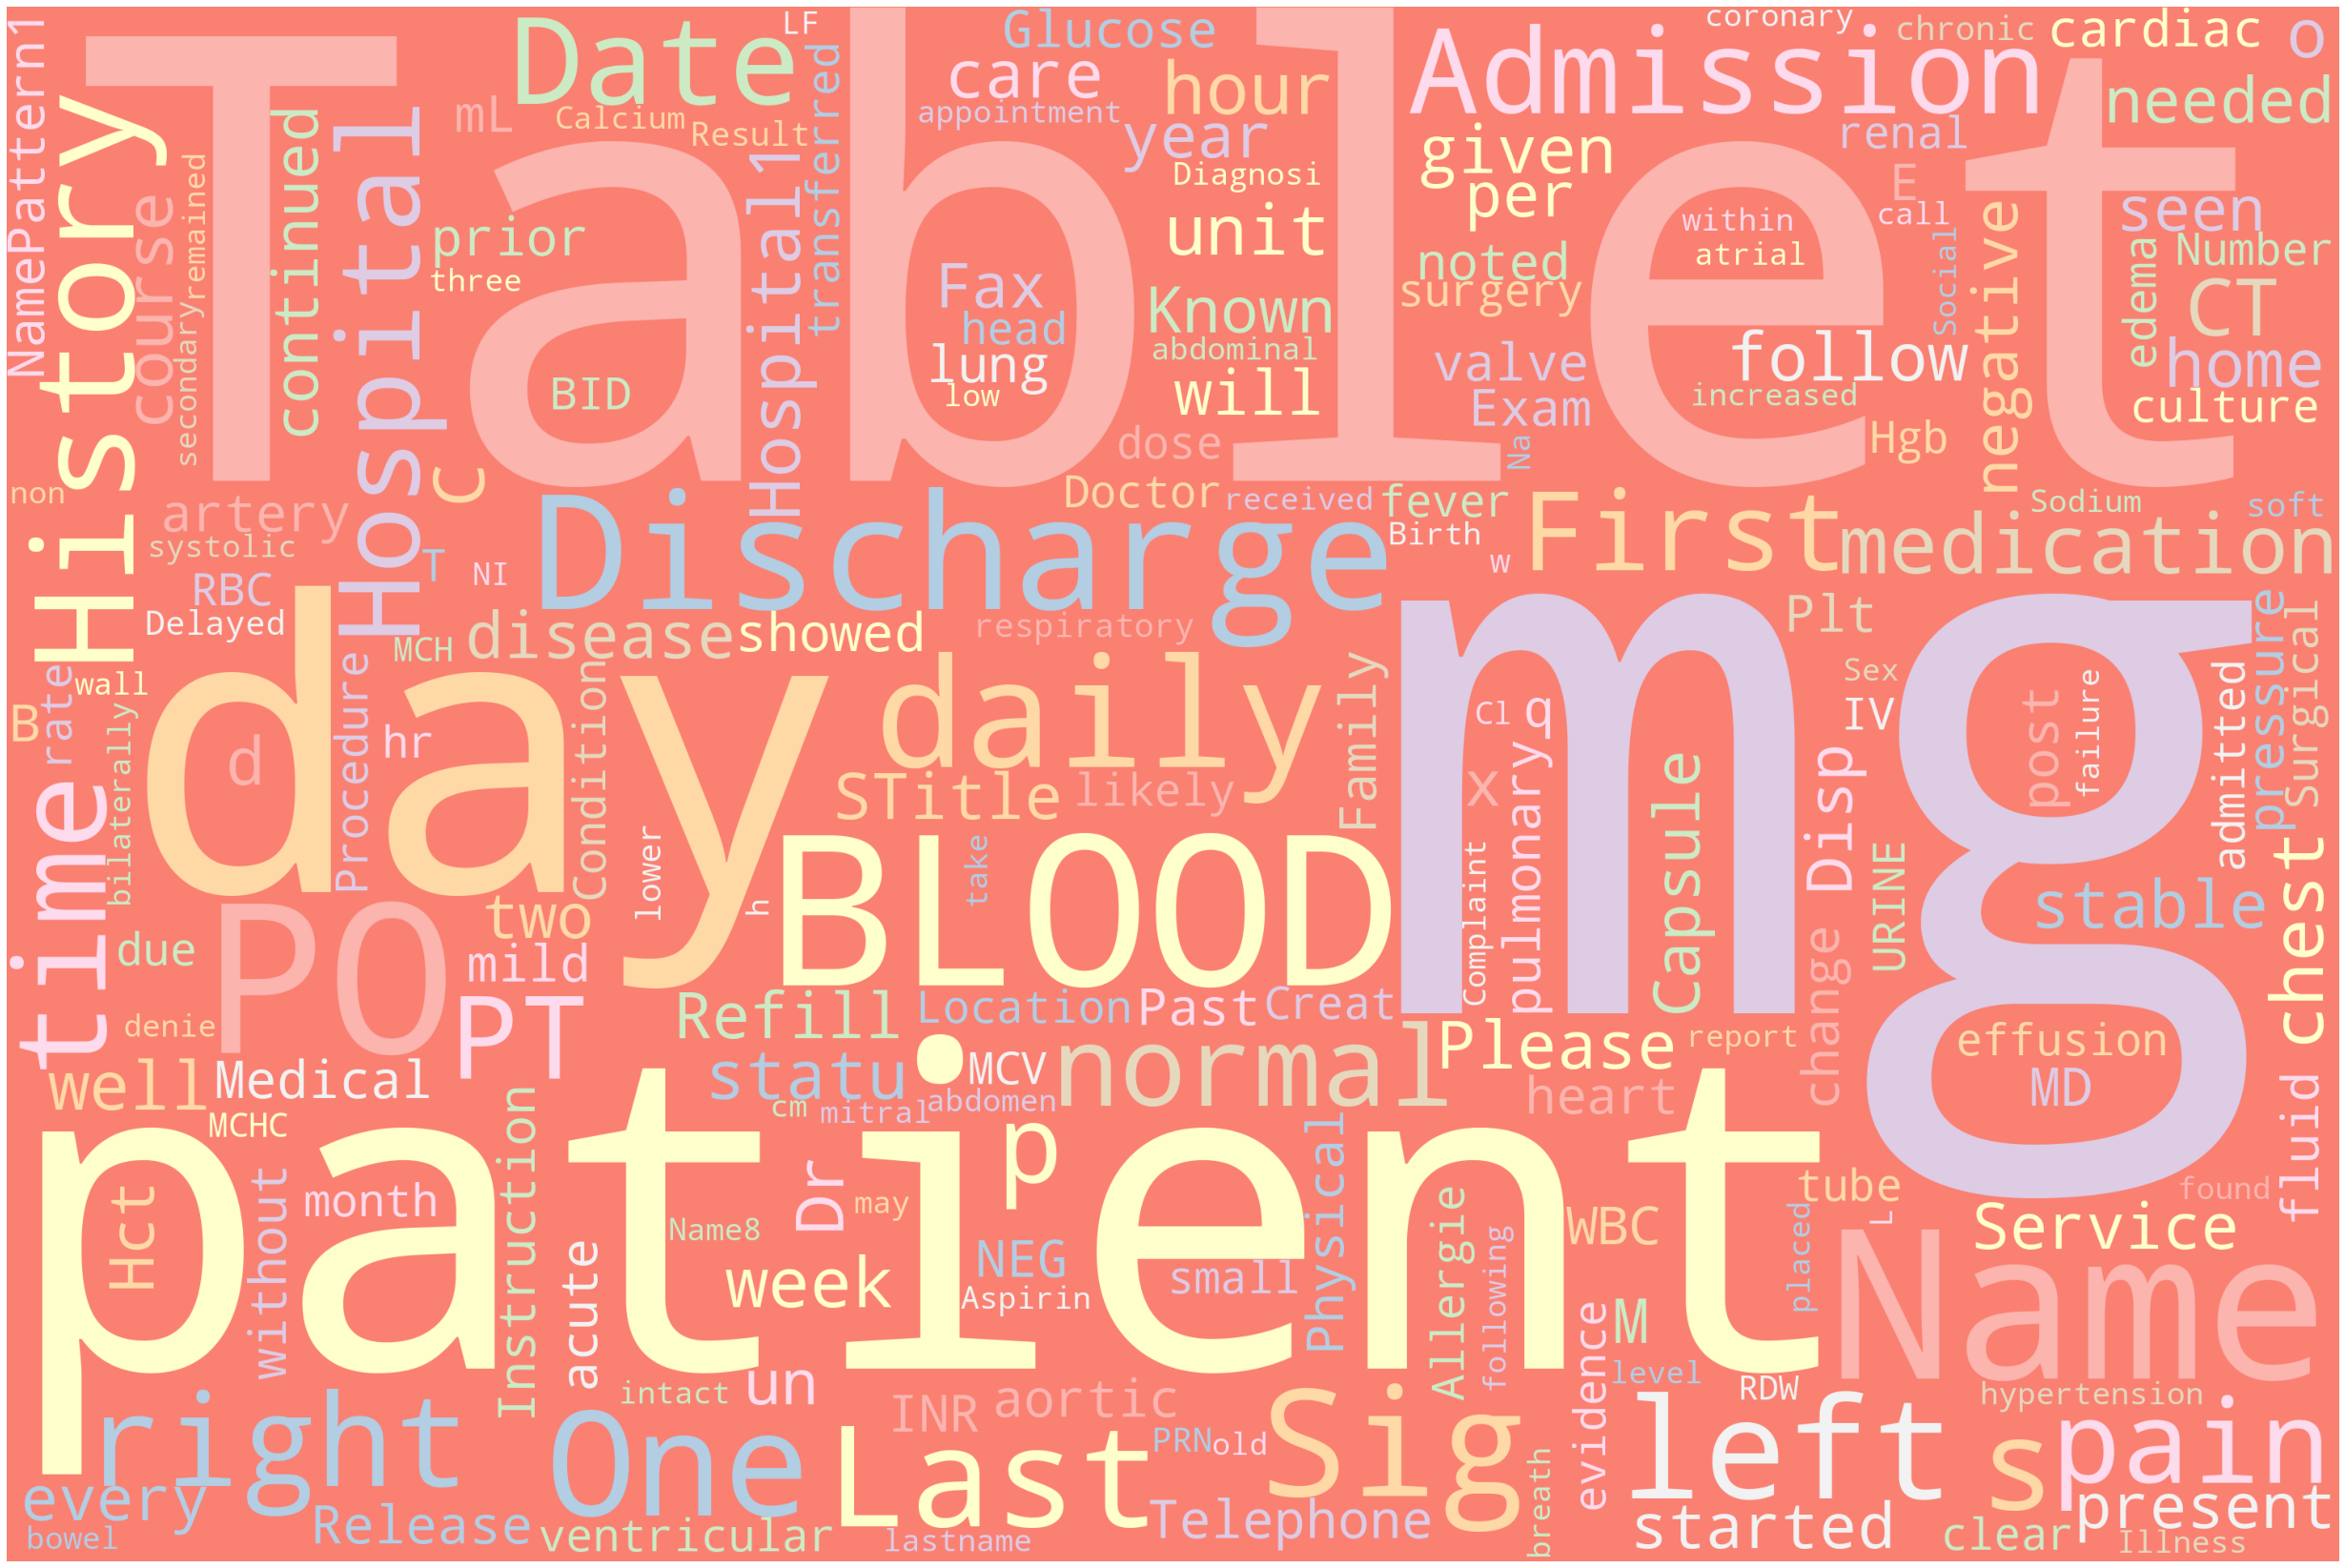

In [88]:
plt.imshow(word_cloud)
plt.axis("off")
plt.rcParams["figure.figsize"] = (100,60)
plt.show()

## Topic Modelling

In [27]:
# Quantity on each Topic
topics_by_doc = []
for text in df_mimic_full['TEXT']:
    topic_list = []
    for m in pattern.finditer(text):
        s = m.group().replace('\n','')
        topic_list.append("_".join(s.lower().split()))
    topics_by_doc.append(" ".join(topic_list))

In [28]:
topics_by_doc[0]

'admission_date discharge_date date_of_birth sex service allergies attending major_surgical_or_invasive_procedure history_of_present_illness past_medical_history social_history family_history physical_exam pertinent_results discharge_labs radiology microbiology brief_hospital_course medications_on_admission discharge_medications discharge_disposition discharge_diagnosis discharge_condition discharge_instructions followup_instructions'

In [31]:
total_avg = sum( map(lambda x: len(x.split()), topics_by_doc) ) / len(topics_by_doc)
topic_distrib = list(map(lambda x: len(x.split()), topics_by_doc))

In [94]:
topic_distrib_d = {}
for i in range(5,60):
    topic_distrib_d[i] = len([_i for _i in topic_distrib if _i == i])

In [113]:
random.choices(list(topic_distrib_d.keys()), weights=list(topic_distrib_d.values()))

[27]

In [32]:
total_avg

25.715754334054097

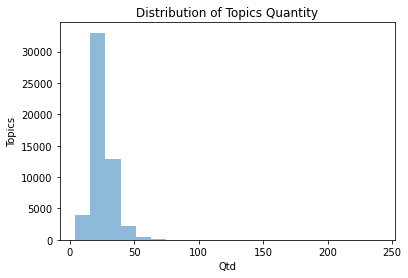

In [33]:
plt.hist(topic_distrib, bins=20,alpha=0.5)
plt.title('Distribution of Topics Quantity')
plt.xlabel('Qtd')
plt.ylabel('Topics')

plt.show()

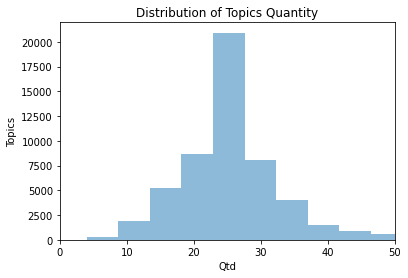

In [34]:
plt.xlim(0, 50)
plt.hist(topic_distrib, bins=50,alpha=0.5)
plt.title('Distribution of Topics Quantity')
plt.xlabel('Qtd')
plt.ylabel('Topics')

plt.show()

In [36]:
# Distribution last topic
last_topics_d = defaultdict(int)
last_words = [i.split()[-1] for i in topics_by_doc]
for i in last_words:
    last_topics_d[i]+=1

In [37]:
df_last_topics = pd.DataFrame(sorted(last_topics_d.items(), key = lambda x: x[1], reverse=True), columns=['topic','qtd'])

In [38]:
df_last_topics.head(11)

topic    qtd
0            completed_by  21219
1   followup_instructions  12565
2                    date   5192
3          medquist36date   4564
4             dictated_by   3920
5              department   1846
6                provider    925
7                      cc    569
8                    name    347
9     discharge_condition    334
10            reviewed_by    184

<AxesSubplot:ylabel='topic'>

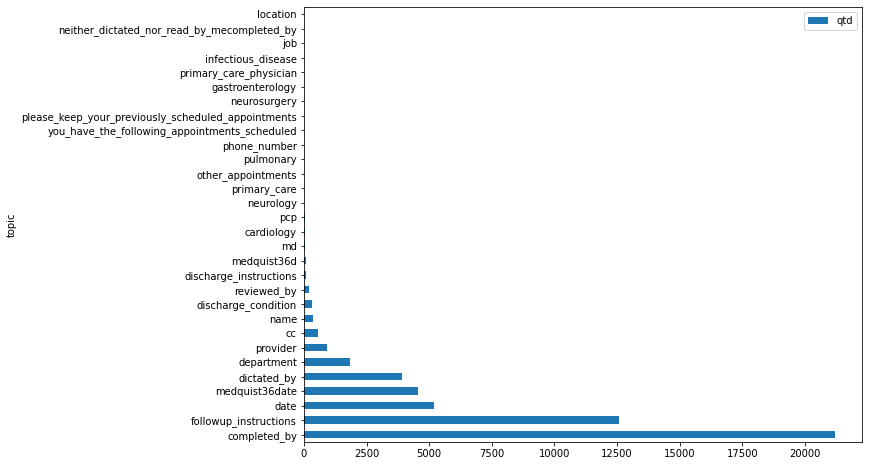

In [39]:
df_last_topics.head(30).plot.barh(x='topic', y='qtd', figsize=(10,8))

### Distribution three last topics

In [36]:
last_words = {}
last_topics_pos = {}
for n in range(-1,-4,-1):
    last_topics_d = defaultdict(int)
    last_words[n] = [i.split()[n] for i in topics_by_doc]
    for _i in last_words[n]:
        last_topics_d[_i]+=1
    last_topics_pos[n] = last_topics_d

In [37]:
df_l = []
for _i, _d in last_topics_pos.items():
    df_l.append(pd.DataFrame(sorted(_d.items(), key = lambda x: x[1], reverse=True), columns=[f'topic_{_i}',f'qtd_{_i}']))

In [38]:
df_last_topics = pd.concat(df_l,axis=1)

In [75]:
df_last_topics.head(10)

topic_-1   qtd_-1                topic_-2   qtd_-2  \
0           completed_by  21219.0   followup_instructions  16912.0   
1  followup_instructions  12565.0  discharge_instructions  11382.0   
2                   date   5192.0             dictated_by   9774.0   
3         medquist36date   4564.0              department   2063.0   
4            dictated_by   3920.0     discharge_diagnoses   1917.0   
5             department   1846.0                facility   1633.0   
6               provider    925.0                provider   1244.0   
7                     cc    569.0     discharge_diagnosis    781.0   
8                   name    347.0     discharge_condition    470.0   
9    discharge_condition    334.0   discharge_disposition    387.0   

                   topic_-3  qtd_-3  
0    discharge_instructions   16074  
1       discharge_condition   11472  
2     followup_instructions    2991  
3     discharge_disposition    2047  
4     discharge_medications    1917  
5       discharge_diagnoses    1911  
6       discharge_diagnosis    1393  
7                department    1121  
8  medications_on_discharge     809  
9           hospital_course     630

In [77]:
topic_3_last = df_last_topics['topic_-1'].head(6).to_list() + ['discharge_instructions']

In [76]:
# Distribution four first topics
first_words = {}
first_topics_pos = {}
for n in range(4):
    first_topics_d = defaultdict(int)
    first_words[n] = [i.split()[n] for i in topics_by_doc]
    for _i in first_words[n]:
        first_topics_d[_i]+=1
    first_topics_pos[n] = first_topics_d

In [118]:
df_l = []
for _i, _d in first_topics_pos.items():
    df_l.append(pd.DataFrame(sorted(_d.items(), key = lambda x: x[1], reverse=True), columns=[f'topic_{_i+1}',f'qtd_{_i+1}']))

In [119]:
df_first_topics = pd.concat(df_l,axis=1)

In [120]:
df_first_topics.head()

topic_1    qtd_1         topic_2    qtd_2  \
0  admission_date  52655.0  discharge_date  52371.0   
1  discharge_date     30.0   date_of_birth    260.0   
2   date_of_birth     16.0         service     48.0   
3         surgeon     10.0             sex     23.0   
4            name      8.0  admission_date      9.0   

                      topic_3    qtd_3                     topic_4  qtd_4  
0               date_of_birth  44187.0                         sex  44189  
1                     service   7235.0                   allergies   5059  
2                         sex   1180.0  history_of_present_illness   1566  
3                   allergies     42.0             chief_complaint    522  
4  history_of_present_illness     28.0                     history    328

In [125]:
df_tmp = df_first_topics[['topic_3','qtd_3']].head(3)
topic_3_distrib = dict(zip(df_tmp.topic_3,df_tmp.qtd_3))

In [126]:
topic_3_distrib

{'date_of_birth': 44187.0, 'service': 7235.0, 'sex': 1180.0}

In [127]:
random.choices(list(topic_3_distrib.keys()), weights=list(topic_3_distrib.values()))

['date_of_birth']

## Trigram Model

In [25]:
ngrams = {}
words = 3

for topic in topics_by_doc:
    words_tokens = nltk.word_tokenize(topic)
    for i in range(len(words_tokens)-words):
        seq = ' '.join(words_tokens[i:i+words])
        if seq not in ngrams.keys():
            ngrams[seq] = []
        ngrams[seq].append(words_tokens[i+words])

In [71]:
words_tokens

['admission_date',
 'discharge_date',
 'service',
 'allergies',
 'attending',
 'major_surgical_or_invasive_procedure',
 'history_of_present_illness',
 'past_medical_history',
 'social_history',
 'family_history',
 'physical_exam',
 'pertinent_results',
 'brief_hospital_course',
 'medications_on_admission',
 'discharge_medications',
 'discharge_disposition',
 'facility',
 'discharge_diagnosis',
 'secondary',
 'discharge_condition',
 'discharge_instructions',
 'followup_instructions',
 'the_following_appointment_was_already_scheduled_for_you']

In [87]:
curr_sequence = ' '.join(['admission_date','discharge_date','date_of_birth'])
output = curr_sequence
for i in range(20):
    if curr_sequence not in ngrams.keys():
        break
    possible_words = ngrams[curr_sequence]
    next_word = possible_words[random.randrange(len(possible_words))]
    output += ' ' + next_word
    seq_words = nltk.word_tokenize(output)
    curr_sequence = ' '.join(seq_words[len(seq_words)-words:len(seq_words)])

print(output)

admission_date discharge_date date_of_birth sex service allergies attending major_surgical_or_invasive_procedure history_of_present_illness past_medical_history social_history family_history physical_exam straight_leg_raise_test pertinent_results brief_hospital_course medications_on_admission discharge_medications discharge_disposition discharge_diagnosis discharge_condition discharge_instructions followup_instructions


## Topic Modeling Final Functions

In [79]:
# mimic_d = {}
# mimic_d['topic_3_dist'] = topic_3_distrib
# mimic_d['count_dist'] = topic_distrib_d
# mimic_d['ngrams'] = ngrams
# mimic_d['topic_3_last'] = topic_3_last

# with open(d_path / 'mimic_d.pkl', 'wb') as f:
#     pickle.dump(mimic_d, f)

In [80]:
with open(d_path / 'mimic_d.pkl', 'rb') as f:
    mimic_d = pickle.load(f)

topic_3_distrib, topic_distrib_d, ngrams, topic_3_last = mimic_d.values()

def gen_mimic_topics():
    # Trigram parameter
    words = 3
    
    # Get the third topic:
    topic_3 = random.choices(list(topic_3_distrib.keys()), weights=list(topic_3_distrib.values()))[0]
    
    # Get Number of topics:
    n_topics = random.choices(list(topic_distrib_d.keys()), weights=list(topic_distrib_d.values()))[0]
    
    # Start topics
    start_topics = ['admission_date','discharge_date', topic_3]
    
    # Get sequence of topics:
    curr_sequence = ' '.join(start_topics)
    output = curr_sequence
    last_flag = 0
    for i in range(n_topics):
        possible_words = ngrams[curr_sequence]
        next_word = possible_words[random.randrange(len(possible_words))]
        
        # Control Flow
        if next_word in output.split():continue
        if next_word in topic_3_last:
            last_flag+=1
        if last_flag >= 3: break
            
        # Add to Output
        output += ' ' + next_word
        seq_words = nltk.word_tokenize(output)
        curr_sequence = ' '.join(seq_words[len(seq_words)-words:len(seq_words)])
    
    return output

In [90]:
gen_mimic_topics()

'admission_date discharge_date date_of_birth sex service allergies attending major_surgical_or_invasive_procedure history_of_present_illness past_medical_history social_history family_history physical_exam pertinent_results sensitivities read_by impression brief_hospital_course medications_on_admission discharge_medications discharge_disposition discharge_diagnosis discharge_condition discharge_instructions followup_instructions'

## Dataset Topics Text

In [67]:
# Pattern to get Topics
sections_d = defaultdict(int)
pattern = re.compile("((?<=\\n\\n)[\w\s]+(?=\:))|Admission Date(?=\:)|Discharge Date(?=\:)|Sex(?=\:)|Chief Complaint(?=\:)", flags=0)

In [ ]:
# Sections and text
sections_d = {}
sections_text = defaultdict(list)
for text in df_mimic_full['TEXT']:
    topics = []
    positions = []
    for m in pattern.finditer(text):
        s = m.group().replace('\n','')
        s = "_".join(s.lower().split())
        topics.append(s)
        positions.append((m.span()[0], m.span()[1]+2))
    for i, topic in enumerate(topics):
        start = positions[i][1]
        try:
            end = positions[i+1][0]
        except:
            end = len(text)-1
        sections_text[topic]+=[text[start:end]]

In [ ]:
sections_text['sex']

In [35]:
def gen_dummy_phi(text):
    mapper = PlaceholderMapper()
    content_modified = ''
    start = 0
    
    for mo in re.finditer("\[\*\*[^\[]*\*\*\]", text):
        replacement = mapper.get_mapping(mo.group(0))

        content_modified += text[start: mo.start()]
        content_modified += replacement
        start = mo.end()
        
    if start < len(text):
        content_modified += text[start: len(text)]
        
    return content_modified

### Age Verification

In [78]:
len(sections_text['history_of_present_illness'])

50060

In [255]:
count=0
year_old_l_1 = ['yo', 'y/o', 'year old', 'year-old', 'year-old', 'y.o', 'year o', 'y old']
year_old_l_2 = ['F','M']
year_old_p_1 = re.compile(f"(\d+)(?=\s*\-*({'|'.join(year_old_l_1)}))")
year_old_p_2 = re.compile(f"(\d+)(?=\s*({'|'.join(year_old_l_2)}))")
age_l = []

for hist_ill in sections_text['history_of_present_illness']:
    if hist_ill:
        target = " ".join(hist_ill.split()[:49])
        target = target.replace("[**Age over 90 **]", "91")
        res = re.search(year_old_p_1, target)
        if res:
            age_l.append(res.group())
            count+=1
        else:
            res = re.search(year_old_p_2, target)
            if res:
                age_l.append(res.group())
                count+=1

In [ ]:
count=0
age_l = []
for hist_ill in sections_text['brief_hospital_course']:
    if hist_ill:
        target = " ".join(hist_ill.split()[:20])
        target = target.replace("[**Age over 90 **]", "91")
        res = re.search(year_old_p_1, hist_ill)
        if res:
            age_l.append(res.group())
        else:
            res = re.search(year_old_p_2, hist_ill)
            if res:
                age_l.append(res.group())
                count+=1

In [124]:
age_l = sorted([i for i in list(map(int, age_l)) if i < 120])

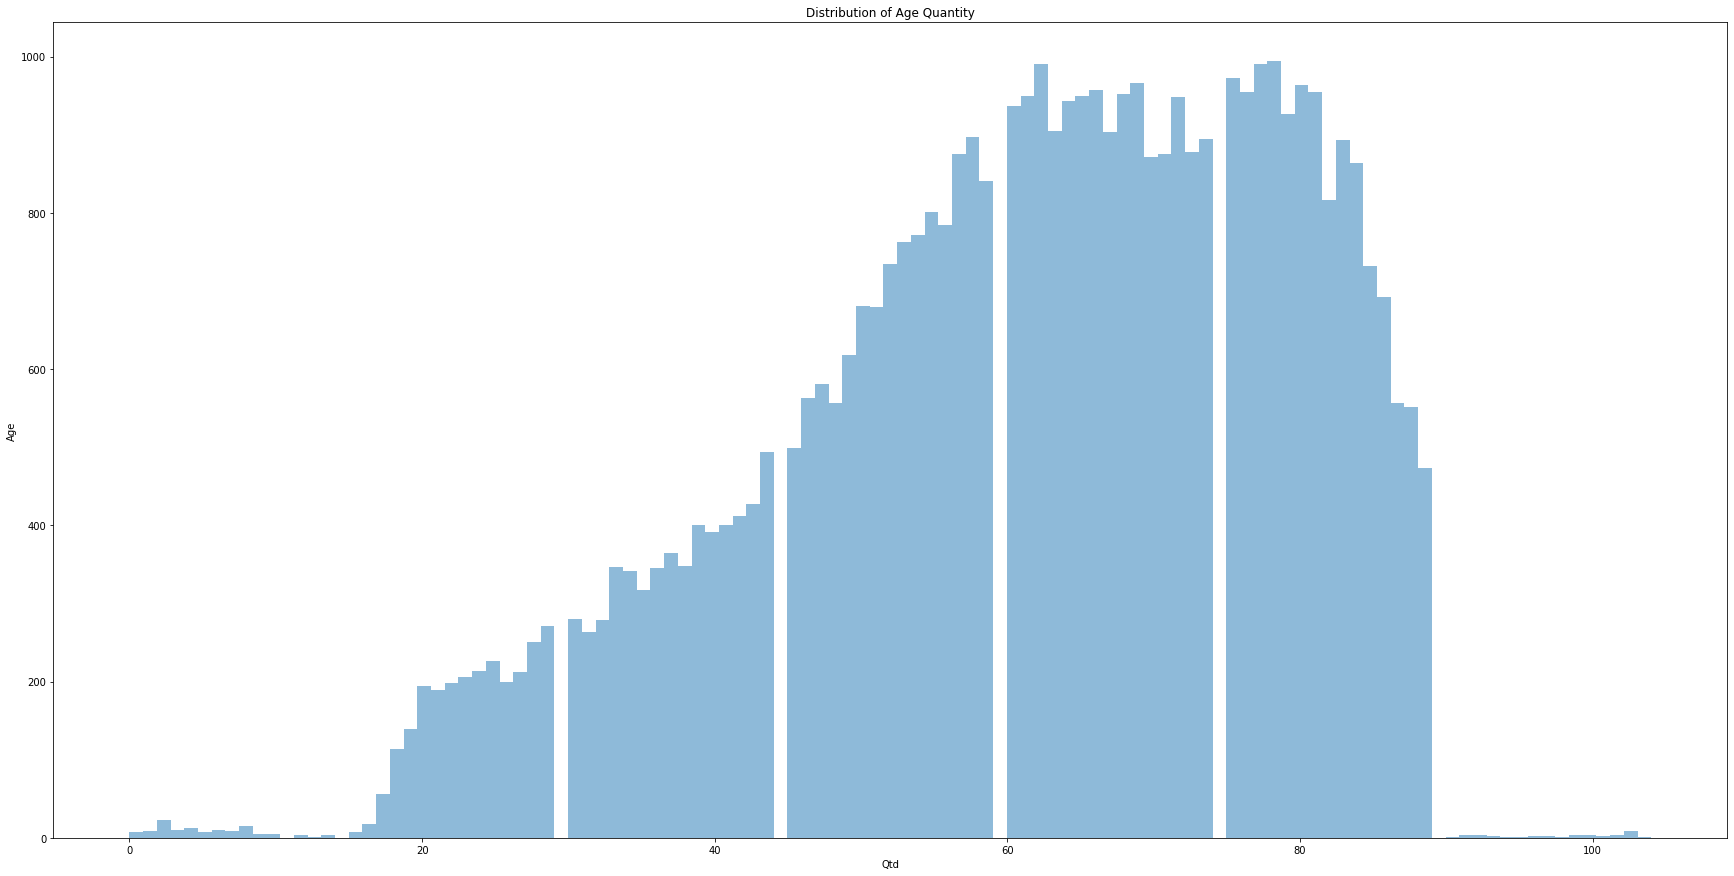

In [128]:
plt.rcParams["figure.figsize"] = (30,15)
plt.hist(age_l, bins=111,alpha=0.5)
plt.title('Distribution of Age Quantity')
plt.xlabel('Qtd')
plt.ylabel('Age')

plt.show()

## System Planning

### 1- Table Formation: [x]

- (Literal) Age, Gender 
- (Chemicals, Allergens) Allergies
- (Problems) Chief Complaint, History Illness, Discharge Diagnosis, Hospital Course
- (Historical Problems) Past Medical History
- (Attention) Social History


### 2 - Text Detection:

- (De-Identification [deid_bert_i2b2]) Admission Date, Patient Name, Age, Doctor Name, Hospital Name  
- (StandfordNLP [spacy-stanza]) Problems  
- (scispaCy & MedspaCy) Allergens, Attention Words, Context Rules - Allergy/Negation/Past Medical History
- (Med7) Medication Allergens, Context Rules


### 3 - Replace:

- Patient Name  
- Patient Age  
- Allergies  
- Chief Complaint  
- Doctor Name  
- Hospital Name  
- Birthdate  
- Admission Date  
- Other Dates  


### 4 - Similarity:

- Match:
Age, Sex
<br>

- Similarity System:  
1- Possible Candidates (Jaccard Similarity)  
2- Best one possible (UMLSBert Similarity)  
<br>

- Weighted Similarity:  
(Problems) Chief Complaint, History of Present Illness, Discharge Diagnosis, Hospital Course 
<br>

- Similarity:  
(Attention Words) Social History  
(Historical Problems - Context Rule) Past Medical History  
<br>


### 5 - AI Generation:  

- History of Present Illness  
- Social History  
- Brief Hospital Course/Hospital Course

In [ ]:
gen_document_sample(62)

## Create Table with Problems, Diseases, Health and Attention Words

In [7]:
# Load MIMIC-III
df_mimic_full = pd.read_csv(d_path / "mimic-iii.csv", index_col=0)

# Replace wrong texts
mimic_replace_d = {
    ":[**":": [**",
    "#:":":",
    "\n\nD:":"\n\nDate:"
}
for orig, repl in mimic_replace_d.items():
    df_mimic_full['TEXT'] = df_mimic_full['TEXT'].apply(lambda x: x.replace(orig, repl))

In [8]:
# Pattern to get Topics
add_topics = ['facility', 'HISTORY  OF  THE  PRESENT  ILLNESS(?=\:)', 'Admission Date(?=\:)', 'Discharge Date(?=\:)', 'Sex(?=\:)', 'Chief Complaint(?=\:)', 'Addendum(?=\:)', '(?i)HISTORY OF PRESENT ILLNESS(?=\:)']
pattern = re.compile(f"((?<=\\n\\n)[\w\s]+(?=\:))|{'|'.join(add_topics)}", flags=0)
hpi_p = re.compile("\[\*\*[^\[]*\*\*\]", flags=0)

def get_topics_text(text):
    topics = []
    positions = []
    sections_text = {}
    for m in pattern.finditer(text):
        s = m.group().replace('\n','')
        s = "_".join(s.lower().split())
        topics.append(s)
        positions.append((m.span()[0], m.span()[1]+2))
    for i, topic in enumerate(topics):
        start = positions[i][1]
        try:
            end = positions[i+1][0]
        except:
            end = len(text)-1
        sections_text[topic]=text[start:end].replace('\n',' ')
        
    return sections_text

In [10]:
def get_entity_options(ents):
    
    entities = ["PROBLEM", "DISEASE", "CHEMICAL","PRODUCT", "ATTENTION", "NEG"]
    colors = {
        'PROBLEM': 'linear-gradient(180deg, #66ffcc, #abf763)',
        'DISEASE': 'linear-gradient(180deg, #66ffcc, #abf763)',
        'CHEMICAL': 'linear-gradient(180deg, #66ffcc, #abf763)',
        'PRODUCT': 'linear-gradient(180deg, #66ffcc, #abf763)',
        'ATTENTION': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 
        "NEG":'linear-gradient(90deg, #ffff66, #ff6600)'}
    options = {"ents": entities, "colors": colors}
    return options

In [7]:
english_nlp = spacy.load('en_core_web_sm')
nlp_spacy_stanza = spacy_stanza.load_pipeline('en', package='mimic', processors={'ner': 'i2b2'}, use_gpu=True, verbose=False)
nlp_spacy_stanza.add_pipe("negex", config={"ent_types":["PROBLEM"]})
nlp_dis = spacy.load("en_ner_bc5cdr_md")
sci_scispacy_nlp = spacy.load("en_core_sci_sm")
sci_scispacy_nlp.add_pipe("negex")

/home/leobit/anaconda3/envs/conda_medtrix_env/lib/python3.10/site-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/home/leobit/anaconda3/envs/conda_medtrix_env/lib/python3.10/site-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/home/leobit/anaconda3/envs/conda_medtrix_env/lib/pyth

In [12]:
def get_allergies(sentence):
    doc_sci = nlp_dis(sentence)
    doc_en = english_nlp(sentence)
    allergies = []
                
    for ent in doc_sci.ents:
        if ent.label_=="CHEMICAL":
            allergies.append(ent.text)
    
    for ent in doc_en.ents:
        if ent.label_=="PRODUCT":
            if ent.text not in allergies:
                allergies.append(ent.text)
                    
    return allergies, doc_sci

In [13]:
def get_problems(sentence):
    doc_stanza = nlp_spacy_stanza(sentence)
    doc_dis_spacy = nlp_dis(sentence)
    problems = []
    negs = []
    
    for ent in doc_stanza.ents:
        if ent.label_=="PROBLEM":
            if not ent._.negex:
                problems.append(ent.text)
            else:
                negs.append(ent.text)
#                 ## Only for Test --
#                 span = Span(doc, ent.start, ent.end, label="NEG")
#                 doc_stanza.ents = [span if e == ent else e for e in doc_stanza.ents]
                
    for ent in doc_dis_spacy.ents:
        dis = ent.text
        if any((dis.lower() in problem.lower()) for problem in problems):
            continue
        if any((dis.lower() in neg.lower()) for neg in negs):
            continue
        problems.append(dis)
                    
    return problems, doc_stanza

In [8]:
def get_attention_words(sentence):
    doc = sci_scispacy_nlp(sentence)
    attentions = []
    for ent in doc.ents:
        if not ent._.negex:
            attentions.append(ent.text)
#             span = Span(doc, ent.start, ent.end, label="NEG")
#             doc.ents = [span if e == ent else e for e in doc.ents]
#         else:
#             attentions.append(ent.text)
#             span = Span(doc, ent.start, ent.end, label="ATTENTION")
#             doc.ents = [span if e == ent else e for e in doc.ents]
            
    return attentions, doc

In [15]:
year_old_l_1 = ['yo', 'y/o', 'year old', 'year-old', 'year-old', 'y.o', 'year o', 'y old']
year_old_l_2 = ['F','M']
year_old_p_1 = re.compile(f"(\d+)(?=\s*\-*({'|'.join(year_old_l_1)}))")
year_old_p_2 = re.compile(f"(\d+)(?=\s*({'|'.join(year_old_l_2)}))")


def get_age(sentence):
    if sentence:
        target = " ".join(sentence.split()[:50])
        target = target.replace("[**Age over 90 **]", "999")
        res = re.search(year_old_p_1, target)
        if res:
            return res.group()
        else:
            res = re.search(year_old_p_2, target)
            if res:
                return res.group()
    
    return ''

In [259]:
document_example = get_topics_text(df_mimic_full['TEXT'][50])

In [261]:
%%time
get_age(document_example['history_of_present_illness'])

CPU times: user 35 µs, sys: 6 µs, total: 41 µs
Wall time: 43.4 µs


'89'

In [228]:
%%time
allergies, doc = get_allergies(document_example['allergies'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 16.8 ms, sys: 527 µs, total: 17.3 ms
Wall time: 15.8 ms


In [222]:
allergies

[]

In [166]:
%%time
problems, doc = get_problems(document_example['chief_complaint'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 25.7 ms, sys: 10.5 ms, total: 36.2 ms
Wall time: 33.7 ms


In [125]:
%%time
problems, doc = get_problems(document_example['history_of_present_illness'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 162 ms, sys: 43.9 ms, total: 206 ms
Wall time: 204 ms


In [135]:
%%time
attentions, doc = get_attention_words(document_example['social_history'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 9.88 ms, sys: 3.34 ms, total: 13.2 ms
Wall time: 11.6 ms


In [131]:
%%time
problems, doc = get_problems(document_example['brief_hospital_course'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 165 ms, sys: 37 ms, total: 202 ms
Wall time: 199 ms


In [129]:
%%time
problems, doc = get_problems(document_example['past_medical_history'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 77.3 ms, sys: 37.7 ms, total: 115 ms
Wall time: 113 ms


In [130]:
%%time
problems, doc = get_problems(document_example['discharge_diagnosis'])
displacy.render(doc, style='ent', options=get_entity_options())

CPU times: user 71.8 ms, sys: 12.6 ms, total: 84.4 ms
Wall time: 82.5 ms


### Structure Table

In [136]:
df_mimic_full

TEXT   HADM_ID  \
0      {Admission Date:  [**2117-9-11**]             ...  100001.0   
1      {Admission Date:  [**2150-4-17**]             ...  100003.0   
2      {Admission Date:  [**2108-4-6**]       Dischar...  100006.0   
3      {Admission Date:  [**2145-3-31**]             ...  100007.0   
4      {Admission Date:  [**2162-5-16**]             ...  100009.0   
...                                                  ...       ...   
52717  {Admission Date:  [**2161-10-23**]       Disch...  199993.0   
52718  {Admission Date:  [**2188-7-7**]       Dischar...  199994.0   
52719  {Admission Date: [**2137-12-11**]        Disch...  199995.0   
52720  {Admission Date:  [**2119-2-18**]             ...  199998.0   
52721  {Admission Date:  [**2136-4-4**]              ...  199999.0   

                                               ICD9_CODE  
0      ['25013', '3371', '5849', '5780', 'V5867', '25...  
1      ['53100', '2851', '07054', '5715', '45621', '5...  
2      ['49320', '51881', '486', '20300', '2761', '78...  
3               ['56081', '5570', '9973', '486', '4019']  
4      ['41401', '99604', '4142', '25000', '27800', '...  
...                                                  ...  
52717  ['41031', '42821', '42731', '4271', '5180', '4...  
52718  ['486', '4280', '51881', '3970', '496', '4169'...  
52719  ['4210', '7464', '42971', '30401', '4412', '44...  
52720  ['41401', '9971', '9975', '42731', '78820', '4...  
52721  ['48284', '51881', '5119', '5849', '2761', '78...  

[52722 rows x 3 columns]

In [19]:
# struct_d = defaultdict(list)
for idx, text in tqdm(enumerate(df_mimic_full['TEXT'].to_list()[13737:])):
    
    ## CHECKPOINT
    if idx%10000==0:
        with open(d_path / f'struct_d_{idx}.pkl', 'wb') as f:
            pickle.dump(struct_d, f)

    ## SECTIONS
    sections_text = get_topics_text(text)
    struct_d['text']+=[text]
    
    ## HOSPITAL COURSE DEFINITION
    if 'brief_hospital_course' in sections_text.keys():
        hosp_course = 'brief_hospital_course'
        alt_hosp = 'hospital_course'
    elif 'hospital_course' in sections_text.keys():
        hosp_course = 'hospital_course'
        alt_hosp = 'brief_hospital_course'
    else:
        hosp_course = ''
    
    ## AGE
    hpi = sections_text.get('history_of_present_illness', '')
    hc = sections_text.get(hosp_course, '')
    
    res = get_age(hpi)
    if res:
        struct_d['age']+=[res]
    else:
        res = get_age(hc)
        struct_d['age']+=[res]
        
    
    ## SEX
    sex = sections_text.get('sex','').strip()
    if sex:
        sex = sex[0]
        if sex in ['M','F']:
            struct_d['sex']+=[sex]
        else:
            struct_d['sex']+=['']
    else:
        struct_d['sex']+=['']
    
    
    ## ALLERGIES
    allergies, _ = get_allergies(sections_text.get('allergies',''))
    struct_d['allergies'] += [allergies]
    
    ## CHIEF COMPLAINT
    problems, _ = get_problems(sections_text.get('chief_complaint',''))
    struct_d['chief_complaint'] += [problems]
    
    ## HISTORY OF PRESENT ILLNESS
    problems, _ = get_problems(sections_text.get('history_of_present_illness',''))
    struct_d['history_of_present_illness'] += [problems]
    
    ## SOCIAL HISTORY
    attention, _ = get_attention_words(sections_text.get('social_history',''))
    struct_d['social_history'] += [attention]
    
    ## DISCHARGE DIAGNOSIS
    problems, _ = get_problems(sections_text.get('discharge_diagnosis',''))
    struct_d['discharge_diagnosis'] += [problems]
    
    ## BRIEF HOSPITAL COURSE OR HOSPITAL COURSE
    if hosp_course:
        problems, _ = get_problems(sections_text.get(hosp_course,''))
        struct_d[hosp_course] += [problems]
        struct_d[alt_hosp] += [[]]
    else:
        struct_d['brief_hospital_course'] += [[]]
        struct_d['hospital_course'] += [[]]
    
    ## PAST MEDICAL HISTORY
    problems, _ = get_problems(sections_text.get('past_medical_history',''))
    struct_d['past_medical_history'] += [problems]

38985it [5:50:03,  1.86it/s]


In [30]:
new_struct_d = {}

for key, values in struct_d.items():
    if len(values)==13736:
        new_struct_d[key]=values[:-1]
    else:
        new_struct_d[key]=values

In [20]:
for key, values in struct_d.items():
    print(key)
    print(len(values))

text
52720
age
52720
sex
52720
allergies
52720
chief_complaint
52720
history_of_present_illness
52720
social_history
52720
discharge_diagnosis
52720
brief_hospital_course
52720
hospital_course
52720
past_medical_history
52720


In [21]:
df_struct = pd.DataFrame(struct_d)

In [24]:
df_struct.to_csv(d_path / "df_mimic_struct.csv", index=0)

In [33]:
# with open('struct_d.pkl', 'wb') as f:
#     pickle.dump(new_struct_d, f)

In [17]:
with open(d_path / 'struct_d.pkl', 'rb') as f:
    struct_d = pickle.load(f)

In [320]:
pd.DataFrame(new_struct_d)

text age sex  \
0      {Admission Date:  [**2117-9-11**]             ...  35   F   
1      {Admission Date:  [**2150-4-17**]             ...  59   M   
2      {Admission Date:  [**2108-4-6**]       Dischar...  48   F   
3      {Admission Date:  [**2145-3-31**]             ...  73   F   
4      {Admission Date:  [**2162-5-16**]             ...  60   M   
...                                                  ...  ..  ..   
13730  {Admission Date:  [**2142-2-1**]              ...  60   M   
13731  {Admission Date: [**2129-11-2**]        Discha...  36   M   
13732  {Admission Date:  [**2116-4-28**]     Discharg...  34   F   
13733  {Admission Date:  [**2173-12-30**]            ...  81   F   
13734  {Admission Date:  [**2154-8-1**]              ...  53   F   

                     allergies  \
0                   [Levaquin]   
1                           []   
2                           []   
3      [Penicillins, Dilantin]   
4                           []   
...                        ...   
13730                       []   
13731                       []   
13732      [Percocet, Vicodin]   
13733            [Epinephrine]   
13734                       []   

                                         chief_complaint  \
0                                     [nausea, vomiting]   
1                                 [coffee ground emesis]   
2                                              [Dyspnea]   
3      [Severe abdominal and back pain, Abdominal dis...   
4                                               [Angina]   
...                                                  ...   
13730                                       [Chest pain]   
13731                                                 []   
13732  [Fatigue, shortness of breath, fever, left low...   
13733                            [Cerebellar hemorrhage]   
13734                              [Shortness of breath]   

                              history_of_present_illness  \
0      [Type 1 diabetes mellitus, neuropathy, nephrop...   
1      [HepC cirrhosis, grade I/II esophageal varices...   
2      [multiple myelomas, respiratory distress, resp...   
3      [pancreatitis, previous SBO, abdominal pain, d...   
4      [known coronary disease, AMI, angina, rest ang...   
...                                                  ...   
13730  [new onset chest pain, a moderate fixed defect...   
13731  [trichorionic, triamniotic triplets, intrauter...   
13732  [asthma, obstructive-sleep apnea, fever, chill...   
13733          [slurred speech, a left cerebellar bleed]   
13734  [DTs, shortness of breath, COPD, PNA, bronchit...   

                                          social_history  \
0      [Patient lives, home, Location, daughter, boyf...   
1      [He, lives, drinking alcohol, session, drinks,...   
2      [children, home, home health aid, years, day, ...   
3      [Married, lives, husband, retired pediatric in...   
4      [Race, caucasian, Last Dental Exam, Lives, wif...   
...                                                  ...   
13730  [Denies tobacco history, ETOH, drinks, account...   
13731                                                 []   
13732  [patient lives, elderly, apartment, building, ...   
13733          [Lives, home, walk, ADLS, Denies smoking]   
13734  [patient lives, boyfriend, drinks 1 pint, PPD,...   

                                     discharge_diagnosis  \
0      [Diabetic keotacidosis, Hematemesis (blood in ...   
1                                [Peptic ulcer GI bleed]   
2                                                     []   
3      [Small bowel obstruction, Internal hernia, nec...   
4      [Coronary Artery Disease CAD, AMI, Ventricular...   
...                                                  ...   
13730  [Coronary artery disease, Sinus Bradycardia, A...   
13731  [prematurity, transitional respiratory distres...   
13732                                                 []   
13733  [Left cerebellar hemorrhage, Hydrocephalus UTI...   
137

In [44]:
gen_document_sample(1)

In [306]:
pd.DataFrame(age)

text age sex  \
0  {Admission Date:  [**2117-9-11**]             ...  35   F   
1  {Admission Date:  [**2150-4-17**]             ...  59   M   
2  {Admission Date:  [**2108-4-6**]       Dischar...  48   F   
3  {Admission Date:  [**2145-3-31**]             ...  73   F   
4  {Admission Date:  [**2162-5-16**]             ...  60   M   
5  {Admission Date:  [**2109-12-10**]            ...  54   F   
6  {Admission Date:  [**2177-8-29**]             ...  21   M   
7  {Admission Date:  [**2177-3-12**]             ...  67   M   
8  {Admission Date:  [**2188-5-24**]             ...  55   M   

                 allergies                                    chief_complaint  \
0               [Levaquin]                                 [nausea, vomiting]   
1                       []                             [coffee ground emesis]   
2                       []                                          [Dyspnea]   
3  [Penicillins, Dilantin]  [Severe abdominal and back pain, Abdominal dis...   
4                       []                                           [Angina]   
5            [Penicillins]           [Gross hematuria, weight loss, 50-pound]   
6                       []                                                 []   
7                       []                                [exertional angina]   
8  [Ampicillin, Thorazine]                              [Respiratory Failure]   

                          history_of_present_illness  \
0  [Type 1 diabetes mellitus, neuropathy, nephrop...   
1  [HepC cirrhosis, grade I/II esophageal varices...   
2  [multiple myelomas, respiratory distress, resp...   
3  [pancreatitis, previous SBO, abdominal pain, d...   
4  [known coronary disease, AMI, angina, rest ang...   
5  [Large left renal mass, metastatic RCC, gross ...   
6  [a right sided open femur fracture, right femu...   
7  [exertional angina, Angina, Angina, tapering d...   
8  [Downs Syndrome, MRSA pneumonia, respiratory f...   

                                      social_history  \
0  [Patient lives, home, Location, daughter, boyf...   
1  [He, lives, drinking alcohol, session, drinks,...   
2  [children, home, home health aid, years, day, ...   
3  [Married, lives, husband, retired pediatric in...   
4  [Race, caucasian, Last Dental Exam, Lives, wif...   
5             [smoking history, housewife, daughter]   
6                                          [tobacco]   
7  [Works, administrator, children, Former, smoke...   
8  [Lives, Group, Home, time, Rehab, [**First, Na...   

                                 discharge_diagnosis  \
0  [Diabetic keotacidosis, Hematemesis (blood in ...   
1                            [Peptic ulcer GI bleed]   
2                                                 []   
3  [Small bowel obstruction, Internal hernia, nec...   
4  [Coronary Artery Disease CAD, AMI, Ventricular...   
5  [Metastatic RCC, Left renal mass, renal mass s...   
6  [Left eye abrasion, Rib fractures, Bilat pulmo...   
7  [Coronary Artery Disease, Hypertension, HYPERC...   
8  [Subglottic stenosis, Hosptial acquired pneumo...   

                               brief_hospital_course  \
0  [HTN, poorly controlled type I DM, c/b neuropa...   
1  [HCV cirrhosis, grade II esophageal varices, c...   
2                                                 []   
3  [adhesions, her pain, confusion, decreased oxy...   
4  [non capturing atrial lead, the sternal and pa...   
5  [hypotension, pain, incision, bupivicaine, dil...   
6  [a decreasing Hct, a right femur hematoma, per...   
7  [his coronary artery disease, significant drai...   
8  [Downs Syndrome, MRSA pneumonia, respiratory f...   

                                     hospital_course  \
0                                                 []   
1                                                 []   
2  [Dyspnea, chronic obstructive pulmonary diseas...   
3                                                 []   
4                                                 []   
5               

## Create Table with Family Problems

In [ ]:
df_struct_fam = pd.DataFrame(struct_d)

In [7]:
df_mimic_full

TEXT   HADM_ID  \
0      {Admission Date:  [**2117-9-11**]             ...  100001.0   
1      {Admission Date:  [**2150-4-17**]             ...  100003.0   
2      {Admission Date:  [**2108-4-6**]       Dischar...  100006.0   
3      {Admission Date:  [**2145-3-31**]             ...  100007.0   
4      {Admission Date:  [**2162-5-16**]             ...  100009.0   
...                                                  ...       ...   
52717  {Admission Date:  [**2161-10-23**]       Disch...  199993.0   
52718  {Admission Date:  [**2188-7-7**]       Dischar...  199994.0   
52719  {Admission Date: [**2137-12-11**]        Disch...  199995.0   
52720  {Admission Date:  [**2119-2-18**]             ...  199998.0   
52721  {Admission Date:  [**2136-4-4**]              ...  199999.0   

                                               ICD9_CODE  
0      ['25013', '3371', '5849', '5780', 'V5867', '25...  
1      ['53100', '2851', '07054', '5715', '45621', '5...  
2      ['49320', '51881', '486', '20300', '2761', '78...  
3               ['56081', '5570', '9973', '486', '4019']  
4      ['41401', '99604', '4142', '25000', '27800', '...  
...                                                  ...  
52717  ['41031', '42821', '42731', '4271', '5180', '4...  
52718  ['486', '4280', '51881', '3970', '496', '4169'...  
52719  ['4210', '7464', '42971', '30401', '4412', '44...  
52720  ['41401', '9971', '9975', '42731', '78820', '4...  
52721  ['48284', '51881', '5119', '5849', '2761', '78...  

[52722 rows x 3 columns]

In [9]:
struct_d = defaultdict(list)
for idx, text in tqdm(enumerate(df_mimic_full['TEXT'].to_list())):
    
    ## SECTIONS
    sections_text = get_topics_text(text)
    fam_text = sections_text.get('family_history','')
    
    ## FAMILY HISTORY
    if fam_text:
        struct_d['text']+=[fam_text]
        attention, _ = get_attention_words(fam_text)
        struct_d['family_history'] += [attention]

52722it [04:30, 194.98it/s]


In [10]:
len(struct_d['text'])

40307

In [11]:
struct_d['family_history']

[['parents', 'HTN', 'T2DM', 'Grandfather', 'MI'],
 ['NC'],
 ['Family history',
  'father',
  'died',
  'myocardial infarction',
  'ovarian cancer'],
 ['Father', 'deceased', 'leukemia', 'colon cancer'],
 ['Father', 'died', 'cirrhosis', 'mother', 'died', 'MI'],
 ['Family history'],
 ['Non-contributory'],
 ['Brother', 'MI', 'MI', 'Mother'],
 ['NC'],
 ['Heart disease', 'unspecificed', 'family members'],
 [],
 ['Father', 'CAD', 'CVA', 'Mother', 'Brother', 'diabetes'],
 ['Noncontributory'],
 [],
 [],
 ['diabetes mellitus'],
 ['Premature coronary artery disease-', 'unknown-adopted'],
 ['Unknown'],
 ['mother',
  'died',
  'heart attack',
  'age',
  'died',
  'CVA',
  'age',
  'sister',
  'diabetes',
  'miscarriages'],
 ['Father',
  'died',
  'metastatic prostate cancer',
  'mother',
  'HTN',
  'insulin resistance'],
 ['Mother',
  'CAD',
  'CVA',
  'DM2',
  'Father',
  'died',
  'complications',
  'renal failure',
  'DM',
  'family'],
 ['Mother', 'gastric cancer', 'age', 'Father', 'HTN'],
 [],


In [12]:
df_struct_fam = pd.DataFrame(struct_d)

In [14]:
df_struct_fam.to_csv(d_path / "df_mimic_struct_fam.csv", index=0)

In [16]:
df_struct_fam.to_csv(d_path / "df_mimic_struct_fam.csv", index=0)

text  \
0      Both parents have HTN and T2DM. Grandfather ha...   
1                                                   NC     
2       Family history shows father died of an myocar...   
3      Father: deceased, leukemia Brother: colon canc...   
4      Father died 50yo cirrhosis, mother died 42yo MI     
...                                                  ...   
40302                   Brother and son had MI in 50's     
40303                                 Nonconttributory     
40304  Mother died of renal failure.  Brother died of...   
40305         Denied premature coronary artery disease     
40306  no known family members with IBD. son w/ ? gas...   

                                          family_history  
0                  [parents, HTN, T2DM, Grandfather, MI]  
1                                                   [NC]  
2      [Family history, father, died, myocardial infa...  
3             [Father, deceased, leukemia, colon cancer]  
4            [Father, died, cirrhosis, mother, died, MI]  
...                                                  ...  
40302                                 [Brother, son, MI]  
40303                                 [Nonconttributory]  
40304      [Mother, died, renal failure, died, leukemia]  
40305                                           [Denied]  
40306                               [son w/, gas issues]  

[40307 rows x 2 columns]

## New table with new detections for finetuning:
- Treatment
- Test
- Anatomy
- Medication

In [6]:
df_struct_text = pd.read_csv(d_path / 'df_struct_text.csv')

In [7]:
nlp_spacy_stanza = spacy_stanza.load_pipeline('en', package='mimic', processors={'ner': 'i2b2'}, use_gpu=True, verbose=False, depparse_batch_size=4000)
nlp_spacy_stanza_anatem = spacy_stanza.load_pipeline('en', package='mimic', processors={'ner': 'AnatEM'}, use_gpu=True, verbose=False, depparse_batch_size=4000)
med7_nlp = spacy.load("en_core_med7_lg")
with open(d_path / 'drugs_list.pkl', 'rb') as f:
    drugs_l = pickle.load(f)
drugs_nlp = medspacy.load()
rules = [TargetRule(drug, 'DRUG') for drug in drugs_l]

In [8]:
def get_treatment_test(sentence):
    doc_stanza = nlp_spacy_stanza(sentence)
    treat_l = []
    test_l = []
    for ent in doc_stanza.ents:
        if ent.label_ == 'TREATMENT':
            treat_l.append(ent.text)
        if ent.label_ == 'TEST':
            test_l.append(ent.text)
            
    return treat_l, test_l

In [9]:
def get_drugs(sentence):
    doc_med = med7_nlp(sentence)
    chemicals = [ent.text for ent in doc_med.ents if ent.label_=="DRUG"]
    rules = [TargetRule(chemical, 'ALLERGEN') for chemical in chemicals]
    drugs_nlp.get_pipe('medspacy_target_matcher').add(rules)
    doc = drugs_nlp(sentence)
    return [ent.text for ent in doc.ents]

In [10]:
def get_anatomy(sentence):
    doc_stanza = nlp_spacy_stanza_anatem(sentence)
    return [ent.text for ent in doc_stanza.ents]

In [23]:
struct_d = defaultdict(list)
for idx, text in tqdm(enumerate(df_struct_text['text'].to_list())):
    sections_text = get_topics_text(text)
    
    ## CHECKPOINT
    if idx%2000==0:
        with open(d_path / f'struct_d_new_detect_{idx}.pkl', 'wb') as f:
            pickle.dump(struct_d, f)
            
    if idx==4796:continue # Error
    
    ## HOSPITAL COURSE DEFINITION
    if 'brief_hospital_course' in sections_text.keys():
        hosp_course = 'brief_hospital_course'
        alt_hosp = 'hospital_course'
    elif 'hospital_course' in sections_text.keys():
        hosp_course = 'hospital_course'
        alt_hosp = 'brief_hospital_course'
    else:
        hosp_course = ''
    
    ## HISTORY OF PRESENT ILLNESS
    treat_l, test_l = get_treatment_test(sections_text.get('history_of_present_illness',''))
    struct_d['history_of_present_illness_treat'] += [treat_l]
    struct_d['history_of_present_illness_test'] += [test_l]
    
    drugs = get_drugs(sections_text.get('history_of_present_illness',''))
    struct_d['history_of_present_illness_drugs'] += [drugs]
    
    parts = get_anatomy(sections_text.get('history_of_present_illness',''))
    struct_d['history_of_present_illness_anat'] += [parts]
    
    ## BRIEF HOSPITAL COURSE OR HOSPITAL COURSE
    if hosp_course:
        treat_l, test_l = get_treatment_test(sections_text.get(hosp_course,''))
        struct_d[hosp_course+'_treat'] += [treat_l]
        struct_d[hosp_course+'_test'] += [test_l]
        struct_d[alt_hosp+'_treat'] += [[]]
        struct_d[alt_hosp+'_test'] += [[]]
    else:
        struct_d[hosp_course+'_treat'] += [[]]
        struct_d[hosp_course+'_test'] += [[]]
        struct_d[alt_hosp+'_treat'] += [[]]
        struct_d[alt_hosp+'_test'] += [[]]
    
    drugs = get_drugs(sections_text.get(hosp_course,''))
    struct_d[hosp_course+'_drugs'] += [drugs]
    struct_d[alt_hosp+'_drugs'] += [[]]
    
    parts = get_anatomy(sections_text.get(hosp_course,''))
    struct_d[hosp_course+'_anat'] += [parts]
    struct_d[alt_hosp+'_anat'] += [[]]
    
    ## PAST MEDICAL HISTORY
    treat_l, test_l = get_treatment_test(sections_text.get('past_medical_history',''))
    struct_d['past_medical_history_treat'] += [treat_l]
    struct_d['past_medical_history_test'] += [test_l]
    
    drugs = get_drugs(sections_text.get('past_medical_history',''))
    struct_d['past_medical_history_drugs'] += [drugs]
    
    parts = get_anatomy(sections_text.get('past_medical_history',''))
    struct_d['past_medical_history_anat'] += [parts]
    

52720it [25:23:58,  1.73s/it]


In [31]:
new_struct_d = {}
for topic, _l in struct_d.items():
    topic = str(topic)
    if topic.startswith('history') or topic.startswith('past_medical'):
        new_struct_d[topic] = _l

In [35]:
df_struct_new_detect = pd.DataFrame(new_struct_d)

In [50]:
df_struct_new_detect

history_of_present_illness_treat  \
0      [her 3rd L NS, Insulin srip, 30 mtroprolol tar...   
1      [naproxen, 4L NS IV, protonix, an octreotide d...   
2      [nebulizer, antibiotics, steroids, medication,...   
3                         [multiple abdominal surgeries]   
4      [SL NTG, treatment, coronary bypass grafting, ...   
...                                                  ...   
52714  [CABG, a Nitrocort drip, a dopamine drip, All ...   
52715  [hemodialysis, hemodialysis, further managemen...   
52716  [a balloon valvuloplasty, IV narcotics, intrav...   
52717  [prior PCI, stenting, cardiac surgical interve...   
52718                           [IVFs, a foley catheter]   

                         history_of_present_illness_test  \
0      [AG, bicarb, inital vitals, K, HCO3, Anion Gap...   
1      [EGD, his vitals, rectal exam, Abdominal ultra...   
2        [heart, blood pressure, Her ABG, pH, PCO2, PO2]   
3                                                     []   
4                 [a cardiac catheterization, LC, LVEDP]   
...                                                  ...   
52714                                         [Cath, EF]   
52715   [last echocardiogram, left ventricular function]   
52716  [serial echocardiograms, workup, The bacteria,...   
52717  [Exercise tolerance test, Outside cardiac cath...   
52718                    [workup, initial vitals, a CXR]   

                        history_of_present_illness_drugs  \
0      [NS, Insulin, tartrate, insulin, NS, aspirin, ...   
1      [naproxen, NS, protonix, octreotide, norepinep...   
2      [nebulizer, antibiotics, steroids, Albuterol, ...   
3                                                     []   
4                                                  [NTG]   
...                                                  ...   
52714  [CAD, CABG, diaphoresis, pain, pain, diaphores...   
52715  [chronic, 's, echocardiogram, plus, Chronic, B...   
52716  [valvuloplasty, Hospital, serial, Hospital, Ho...   
52717  [PCI, stenting, pain, dyspnea, tolerance, card...   
52718  ['s, CAD, temp, PCP, continued, pain, urine, f...   

                         history_of_present_illness_anat  \
0                                           [right face]   
1      [esophageal varices, abdominal, abdominal, bro...   
2      [myelomas, respiratory, respiratory, legs, spu...   
3                    [abdominal, abdominal, bowel, oral]   
4      [coronary, cardiac, vessel, coronary, Cardiac,...   
...                                                  ...   
52714  [chest, chest, mitral, saphenous vein grafts, ...   
52715  [heart, pulmonary, heart, renal, heart, right ...   
52716  [aortic, aortic valve, intravenous, head, infa...   
52717  [coronary artery, chest, cardiac, vessel, card...   
52718                             [sputum, chest, urine]   

                              past_medical_history_treat  \
0                                                     []   
1                                           [interferon]   
2                                 [Decadron, intubation]   
3                                                     []   
4           [AICD, s/p ablation, radiation and excision]   
...                                                  ...   
52714                  [coronary artery bypass grafting]   
52715                                                 []   
52716                                    [valvuloplasty]   
52717  [Prior PCI, Stenting to Right Coronary Artery,...   
52718                       [prednisone, pentasa, stent]   

      past_medical_history_test  \
0                 [baseline Cr]   
1                            []   
2          [bone marrow biopsy]   
3                            []   
4                     [LCx, EF]   
...                         ...   
52714                        []   
52715                        []   
52716                        []   
52717                        []   
52718     [colonoscopy, biopsy]   

In [12]:
struct_d_4796 = defaultdict(list)
for idx, text in tqdm(enumerate(df_struct_text['text'].to_list())):
    if idx==4796:
        sections_text = get_topics_text(text)
        ## HISTORY OF PRESENT ILLNESS
        treat_l, test_l = get_treatment_test(sections_text.get('history_of_present_illness',''))
        struct_d_4796['history_of_present_illness_treat'] += treat_l
        struct_d_4796['history_of_present_illness_test'] += test_l

        drugs = get_drugs(sections_text.get('history_of_present_illness',''))
        struct_d_4796['history_of_present_illness_drugs'] += drugs

        parts = get_anatomy(sections_text.get('history_of_present_illness',''))
        struct_d_4796['history_of_present_illness_anat'] += parts

        ## PAST MEDICAL HISTORY
        treat_l, test_l = get_treatment_test(sections_text.get('past_medical_history',''))
        struct_d_4796['past_medical_history_treat'] += treat_l
        struct_d_4796['past_medical_history_test'] += test_l

        drugs = get_drugs(sections_text.get('past_medical_history',''))
        struct_d_4796['past_medical_history_drugs'] += drugs

        parts = get_anatomy(sections_text.get('past_medical_history',''))
        struct_d_4796['past_medical_history_anat'] += parts

52720it [00:01, 45079.25it/s]


In [31]:
line_4796 = []
for value in struct_d_4796.values():
    line_4796.append(value)

In [32]:
line_4796

[['reinduction',
  'idarubicin',
  'cytarabine',
  'synergeneic transplant',
  'BU/CY containing regimen',
  'hickman',
  'Daptomycin',
  'ativan',
  'chemo',
  'this hospitalization'],
 ['a routine physical exam',
  'CBC',
  'white count',
  'immunophenotyping',
  'CD13',
  'a bone marrow biopsy',
  'bone marrow biopsy',
  'Last bone marrow biopsy',
  'CD34',
  'CD13',
  'CMV viral load',
  'weight'],
 ['cytarabine', 'Daptomycin', 'ativan', 'chemo'],
 ['AML',
  'blasts',
  'bone marrow',
  'bone marrow',
  'bone marrow',
  'AML',
  'CD34/CD13',
  'blast cells',
  'blood',
  'stool',
  'chest'],
 [],
 ['CD13', 'bone marrow biopsy'],
 [],
 ['AML', 'bone marrow', 'fibroids']]

In [53]:
df_struct_new_detect.to_csv(d_path / 'df_struct_new_detect.csv', index=0)

In [17]:
df_struct_new_detect = pd.read_csv(d_path / 'df_struct_new_detect.csv')

In [33]:
df_struct_new_detect.loc[4795.5] = line_4796

In [34]:
df_struct_new_detect = df_struct_new_detect.sort_index().reset_index(drop=True)

In [36]:
df_struct_new_detect.loc[4760:4800]

history_of_present_illness_treat  \
4760            ['Chamberlain', 'left upper lobectomy']   
4761  ['left groin', 'drainage', 'excision of left l...   
4762                                      ['acyclovir']   
4763  ['fluoxetine', 'delivery', 'Intrapartum antibi...   
4764                       ['empirical levo', 'flagyl']   
4765  ['navelbine', 'avastin', 'Chemo', '3 L NS', 'V...   
4766  ['antibiotics', 'Levofloxacin', 'Gentamicin', ...   
4767                           ['intubated', 'sedated']   
4768  ['80 mg IV protonix', 'an octreotide gtt', '1 ...   
4769                 ['a coronary artery bypass graft']   
4770                                                 []   
4771  ['PICC line', 'Ciprofloxacin', 'a PICC line', ...   
4772               ['sternotomy', 'treatment', 'lasix']   
4773  ['s/p stent placement', 'antacids', 'stenting ...   
4774  ['nasal intubation', 'Aspirin', 'Plavix', 'Fir...   
4775                         ['surgery', 'her surgery']   
4776                                                 []   
4777  ['percutaneous cholecystotomy drainage', 'a dr...   
4778  ['his insulin', 'd50', 'glucagon', 'a right ax...   
4779  ['a laparoscopic cholecystectomy', 'a cholecys...   
4780  ['a central line', 'IV fluids', 'nifedipine', ...   
4781                                                 []   
4782  ['amoxacillin', 'clindamycin', 'NG tube', 'Lef...   
4783  ['HD', 'tunnel line', 'HD', 'fistula in left a...   
4784    ['lap roux en y gastric bypass', 'PO steroids']   
4785  ['Vancomycin', 'tailered therapy', 'Nafcillin'...   
4786  ['PTCA of LAD', 'LCX', 'cardiac surgical inter...   
4787  ['20min extraction', 'L chest needle decompres...   
4788  ['gastric bypass', 'fluid resuscitated', 'mana...   
4789                                       ['coumadin']   
4790                                                 []   
4791  ['intubated', 'the water tap', 'intubated', '"...   
4792                 ['doxycycline', 'PPI', 'Warfarin']   
4793  ['coronary artery bypass graft', 'St. Jude val...   
4794  ['biliary stenting', 'any treatments', 'proper...   
4795                                        ['home O2']   
4796  [reinduction, idarubicin, cytarabine, synergen...   
4797  ['coumadin', 'IVF', '1 u pRBC', 'cipro', 'flag...   
4798  ['heart transplant', 'weekly nesiritide infusi...   
4799  ['left main stem stenting', 'stent', 'tracheal...   
4800     ['coumadin', 'intubated', 'airway protection']   

                        history_of_present_illness_test  \
4760  ['chest x-ray', 'mediastinoscopy', 'Follow-up ...   
4761                                 ['an exploration']   
4762                                                 []   
4763  ['prenatal screens', 'Apgar scores', 'head cir...   
4764  ['workup', 'abdominal CT scan', 'workup', 'blo...   
4765  ['BP', 'BP', 'Inital resident echo', 'formal T...   
4766  ['The blood cultures', 'two cultures', 'Systol...   
4767                         ['ETOH BAL', 'assessment']   
4768  ['her initial VS', 'T', 'HR', 'BP', 'RR', 'Sat...   
4769   ['a routine postoperative wound checks', 'exam']   
4770                       ['systolic blood pressures']   
4771  ['magnetic resonance imaging scan', 'ultrasoun...   
4772                                 ['echo', 'An ABG']   
4773              ['Subsequent serial echocardiograms']   
4774  ['EKG', 'Initial enzymes CPK', 'troponin', "Pt...   
4775      ['a colonoscopy', 'colonoscopy', 'a CT scan']   
4776                                                 []   
4777                                             ['EF']   
4778  ['a blood sugar', 'his blood sugars', 'monopha...   
4779               ['liver biopsy', 'The liver biopsy']   
4780                  ['a lactate', 'his BP', 'his BP']   
4781                                                 []   
4782  ['SBP', 'guaiac', 'Labs', 'Lactate', 'Cr', 'AG...   
4783          ['repeat exam stool', 'her electrolytes']   
4784                                                 []   
4785  ['al

In [37]:
df_struct_new_detect.to_csv(d_path / 'df_struct_new_detect.csv', index=0)

In [13]:
struct_d = defaultdict(list)
for idx, text in tqdm(enumerate(df_struct_text['text'].to_list())):
    sections_text = get_topics_text(text)
    
    ## CHECKPOINT
    if idx%2000==0:
        with open(d_path / f'struct_d_new_detect_hospcourse_{idx}.pkl', 'wb') as f:
            pickle.dump(struct_d, f)
    
    ## HOSPITAL COURSE DEFINITION
    if 'brief_hospital_course' in sections_text.keys():
        hosp_course = 'brief_hospital_course'
        alt_hosp = 'hospital_course'
    elif 'hospital_course' in sections_text.keys():
        hosp_course = 'hospital_course'
        alt_hosp = 'brief_hospital_course'
    else:
        hosp_course = 'hospital_course'
        alt_hosp = 'brief_hospital_course'
    
    ## BRIEF HOSPITAL COURSE OR HOSPITAL COURSE
    treat_l, test_l = get_treatment_test(sections_text.get(hosp_course,''))
    struct_d[hosp_course+'_treat'] += [treat_l]
    struct_d[hosp_course+'_test'] += [test_l]
    struct_d[alt_hosp+'_treat'] += [[]]
    struct_d[alt_hosp+'_test'] += [[]]

    drugs = get_drugs(sections_text.get(hosp_course,''))
    struct_d[hosp_course+'_drugs'] += [drugs]
    struct_d[alt_hosp+'_drugs'] += [[]]

    parts = get_anatomy(sections_text.get(hosp_course,''))
    struct_d[hosp_course+'_anat'] += [parts]
    struct_d[alt_hosp+'_anat'] += [[]]

52720it [11:54:08,  1.23it/s]


In [14]:
df_struct_new_detect_hosp_course = pd.DataFrame(struct_d)

In [15]:
df_struct_new_detect_hosp_course

brief_hospital_course_treat  \
0      [Humalog SS, long acting Levemir, an insulin d...   
1      [naproxen, pantoprazole, tylenol, NSAIDs, Bloo...   
2                                                     []   
3      [small bowel resection, jejunosotomy, lysis, m...   
4      [Coronary artery bypass graft, the procedure, ...   
...                                                  ...   
52715                                                 []   
52716                                                 []   
52717                                                 []   
52718  [surgery, pump coronary artery bypass grafting...   
52719  [azithromycin, levofloxacin, facemask, high fl...   

                              brief_hospital_course_test  \
0      [Sugars, glucose, UA, Her electrolytes, SBP, h...   
1                     [Mr, EGD, repeat endoscopy, tbili]   
2                                                     []   
3      [an uncomplicated exploratory laparatomy, CXR,...   
4                                  [invasive monitoring]   
...                                                  ...   
52715                                                 []   
52716                                                 []   
52717                                                 []   
52718  [routine preoperative evaluation, his workup, ...   
52719  [CT chest, CXR, CXR post-thoracentesis, Pleura...   

                                   hospital_course_treat  \
0                                                     []   
1                                                     []   
2      [BIPAP, intravenous Solu-Medrol, nebulizer tre...   
3                                                     []   
4                                                     []   
...                                                  ...   
52715  [coronary artery bypass grafting, coronary art...   
52716                                                 []   
52717                                                 []   
52718                                                 []   
52719                                                 []   

                                    hospital_course_test  \
0                                                     []   
1                                                     []   
2      [sating, her chest x-rays, An echocardiogram, ...   
3                                                     []   
4                                                     []   
...                                                  ...   
52715  [Chest x-ray, bronchoscopy, Chest x-ray, patie...   
52716                                                 []   
52717                                                 []   
52718                                                 []   
52719                                                 []   

                             brief_hospital_course_drugs  \
0      [Humalog, Levemir, insulin, ativan, compazine,...   
1              [naproxen, pantoprazole, tylenol, NSAIDs]   
2                                                     []   
3      [morphine, Cefazolin, Flagyl, Narcotics, Vanc,...   
4      [vasopressor, Beta blocker, Lisinopril, analge...   
...                                                  ...   
52715                                                 []   
52716                                                 []   
52717                                                 []   
52718  [cardiac, preoperative, pump, CVICU, extubated...   
52719  [azithromycin, levofloxacin, continued, oxygen...   

                                   hospital_course_drugs  \
0                                                     []   
1                                                     []   
2      [Zithromax, Coumadin, Lovenox, Coumadin, Rispe...   
3                                                     []   
4                                                     []   
...                                                  ...   
5271

In [19]:
df_struct_new_detect

history_of_present_illness_treat  \
0      ['her 3rd L NS', 'Insulin srip', '30 mtroprolo...   
1      ['naproxen', '4L NS IV', 'protonix', 'an octre...   
2      ['nebulizer', 'antibiotics', 'steroids', 'medi...   
3                       ['multiple abdominal surgeries']   
4      ['SL NTG', 'treatment', 'coronary bypass graft...   
...                                                  ...   
52715  ['CABG', 'a Nitrocort drip', 'a dopamine drip'...   
52716  ['hemodialysis', 'hemodialysis', 'further mana...   
52717  ['a balloon valvuloplasty', 'IV narcotics', 'i...   
52718  ['prior PCI', 'stenting', 'cardiac surgical in...   
52719                       ['IVFs', 'a foley catheter']   

                         history_of_present_illness_test  \
0      ['AG', 'bicarb', 'inital vitals', 'K', 'HCO3',...   
1      ['EGD', 'his vitals', 'rectal exam', 'Abdomina...   
2      ['heart', 'blood pressure', 'Her ABG', 'pH', '...   
3                                                     []   
4           ['a cardiac catheterization', 'LC', 'LVEDP']   
...                                                  ...   
52715                                     ['Cath', 'EF']   
52716  ['last echocardiogram', 'left ventricular func...   
52717  ['serial echocardiograms', 'workup', 'The bact...   
52718  ['Exercise tolerance test', 'Outside cardiac c...   
52719              ['workup', 'initial vitals', 'a CXR']   

                        history_of_present_illness_drugs  \
0      ['NS', 'Insulin', 'tartrate', 'insulin', 'NS',...   
1      ['naproxen', 'NS', 'protonix', 'octreotide', '...   
2      ['nebulizer', 'antibiotics', 'steroids', 'Albu...   
3                                                     []   
4                                                ['NTG']   
...                                                  ...   
52715  ['CAD', 'CABG', 'diaphoresis', 'pain', 'pain',...   
52716  ['chronic', "'s", 'echocardiogram', 'plus', 'C...   
52717  ['valvuloplasty', 'Hospital', 'serial', 'Hospi...   
52718  ['PCI', 'stenting', 'pain', 'dyspnea', 'tolera...   
52719  ["'s", 'CAD', 'temp', 'PCP', 'continued', 'pai...   

                         history_of_present_illness_anat  \
0                                         ['right face']   
1      ['esophageal varices', 'abdominal', 'abdominal...   
2      ['myelomas', 'respiratory', 'respiratory', 'le...   
3            ['abdominal', 'abdominal', 'bowel', 'oral']   
4      ['coronary', 'cardiac', 'vessel', 'coronary', ...   
...                                                  ...   
52715  ['chest', 'chest', 'mitral', 'saphenous vein g...   
52716  ['heart', 'pulmonary', 'heart', 'renal', 'hear...   
52717  ['aortic', 'aortic valve', 'intravenous', 'hea...   
52718  ['coronary artery', 'chest', 'cardiac', 'vesse...   
52719                       ['sputum', 'chest', 'urine']   

                              past_medical_history_treat  \
0                                                     []   
1                                         ['interferon']   
2                             ['Decadron', 'intubation']   
3                                                     []   
4      ['AICD', 's/p ablation', 'radiation and excisi...   
...                                                  ...   
52715                ['coronary artery bypass grafting']   
52716                                                 []   
52717                                  ['valvuloplasty']   
52718  ['Prior PCI', 'Stenting to Right Coronary Arte...   
52719                 ['prednisone', 'pentasa', 'stent']   

       past_medical_history_test  \
0                ['baseline Cr']   
1                             []   
2         ['bone marrow biopsy']   
3                             []   
4                  ['LCx', 'EF']   
...                          ...   
52715                         []   
52716                         []   
52717                         []   
52718                         []   
52719  ['colonoscopy', 

In [23]:
df_struct_new_detect_f = pd.concat([df_struct_new_detect, df_struct_new_detect_hosp_course], axis=1)

In [25]:
df_struct_new_detect_f.to_csv(d_path / 'df_struct_new_detect.csv', index=0)

In [26]:
df_struct_new_detect_f = pd.read_csv(d_path / 'df_struct_new_detect.csv')

In [27]:
df_struct_new_detect_f

history_of_present_illness_treat  \
0      ['her 3rd L NS', 'Insulin srip', '30 mtroprolo...   
1      ['naproxen', '4L NS IV', 'protonix', 'an octre...   
2      ['nebulizer', 'antibiotics', 'steroids', 'medi...   
3                       ['multiple abdominal surgeries']   
4      ['SL NTG', 'treatment', 'coronary bypass graft...   
...                                                  ...   
52715  ['CABG', 'a Nitrocort drip', 'a dopamine drip'...   
52716  ['hemodialysis', 'hemodialysis', 'further mana...   
52717  ['a balloon valvuloplasty', 'IV narcotics', 'i...   
52718  ['prior PCI', 'stenting', 'cardiac surgical in...   
52719                       ['IVFs', 'a foley catheter']   

                         history_of_present_illness_test  \
0      ['AG', 'bicarb', 'inital vitals', 'K', 'HCO3',...   
1      ['EGD', 'his vitals', 'rectal exam', 'Abdomina...   
2      ['heart', 'blood pressure', 'Her ABG', 'pH', '...   
3                                                     []   
4           ['a cardiac catheterization', 'LC', 'LVEDP']   
...                                                  ...   
52715                                     ['Cath', 'EF']   
52716  ['last echocardiogram', 'left ventricular func...   
52717  ['serial echocardiograms', 'workup', 'The bact...   
52718  ['Exercise tolerance test', 'Outside cardiac c...   
52719              ['workup', 'initial vitals', 'a CXR']   

                        history_of_present_illness_drugs  \
0      ['NS', 'Insulin', 'tartrate', 'insulin', 'NS',...   
1      ['naproxen', 'NS', 'protonix', 'octreotide', '...   
2      ['nebulizer', 'antibiotics', 'steroids', 'Albu...   
3                                                     []   
4                                                ['NTG']   
...                                                  ...   
52715  ['CAD', 'CABG', 'diaphoresis', 'pain', 'pain',...   
52716  ['chronic', "'s", 'echocardiogram', 'plus', 'C...   
52717  ['valvuloplasty', 'Hospital', 'serial', 'Hospi...   
52718  ['PCI', 'stenting', 'pain', 'dyspnea', 'tolera...   
52719  ["'s", 'CAD', 'temp', 'PCP', 'continued', 'pai...   

                         history_of_present_illness_anat  \
0                                         ['right face']   
1      ['esophageal varices', 'abdominal', 'abdominal...   
2      ['myelomas', 'respiratory', 'respiratory', 'le...   
3            ['abdominal', 'abdominal', 'bowel', 'oral']   
4      ['coronary', 'cardiac', 'vessel', 'coronary', ...   
...                                                  ...   
52715  ['chest', 'chest', 'mitral', 'saphenous vein g...   
52716  ['heart', 'pulmonary', 'heart', 'renal', 'hear...   
52717  ['aortic', 'aortic valve', 'intravenous', 'hea...   
52718  ['coronary artery', 'chest', 'cardiac', 'vesse...   
52719                       ['sputum', 'chest', 'urine']   

                              past_medical_history_treat  \
0                                                     []   
1                                         ['interferon']   
2                             ['Decadron', 'intubation']   
3                                                     []   
4      ['AICD', 's/p ablation', 'radiation and excisi...   
...                                                  ...   
52715                ['coronary artery bypass grafting']   
52716                                                 []   
52717                                  ['valvuloplasty']   
52718  ['Prior PCI', 'Stenting to Right Coronary Arte...   
52719                 ['prednisone', 'pentasa', 'stent']   

       past_medical_history_test  \
0                ['baseline Cr']   
1                             []   
2         ['bone marrow biopsy']   
3                             []   
4                  ['LCx', 'EF']   
...                          ...   
52715                         []   
52716                         []   
52717                         []   
52718                         []   
52719  ['colonoscopy', 

In [28]:
df_struct_text

text
0      {Admission Date:  [**2117-9-11**]             ...
1      {Admission Date:  [**2150-4-17**]             ...
2      {Admission Date:  [**2108-4-6**]       Dischar...
3      {Admission Date:  [**2145-3-31**]             ...
4      {Admission Date:  [**2162-5-16**]             ...
...                                                  ...
52715  {Admission Date:  [**2161-10-23**]       Disch...
52716  {Admission Date:  [**2188-7-7**]       Dischar...
52717  {Admission Date: [**2137-12-11**]        Disch...
52718  {Admission Date:  [**2119-2-18**]             ...
52719  {Admission Date:  [**2136-4-4**]              ...

[52720 rows x 1 columns]